In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 9ms/step - loss: 2.2428 - rmse: 1.4089
Epoch 2/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.0648 - rmse: 1.3444
Epoch 3/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8996 - rmse: 1.2817
Epoch 4/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7191 - rmse: 1.2093
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5446 - rmse: 1.1350
Epoch 6/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4164 - rmse: 1.0772
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3034 - rmse: 1.0236
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1350 - rmse: 0.9379
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0516 - rmse: 0.8925
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0117 - rmse: 0.8701
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 9ms/step - loss: 0.3997 - rmse: 0.4122
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3973 - rmse: 0.4097
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4010 - rmse: 0.4145
Epoch 89/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3959 - rmse: 0.4088
Epoch 90/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3956 - rmse: 0.4087
Epoch 91/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3944 - rmse: 0.4077
Epoch 92/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3929 - rmse: 0.4062
Epoch 93/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3916 - rmse: 0.4049
Epoch 94/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3903 - rmse: 0.4038
Epoch 95/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3896 - rmse: 0.4033
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.3223 - rmse: 0.3425
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3202 - rmse: 0.3399
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3195 - rmse: 0.3391
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3196 - rmse: 0.3398
Epoch 174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3181 - rmse: 0.3379
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3174 - rmse: 0.3372
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3163 - rmse: 0.3361
Epoch 177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3172 - rmse: 0.3377
Epoch 178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3145 - rmse: 0.3342
Epoch 179/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3165 - rmse: 0.3376
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.2564 - rmse: 0.2689
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2561 - rmse: 0.2687
Epoch 256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2568 - rmse: 0.2705
Epoch 257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2550 - rmse: 0.2675
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2542 - rmse: 0.2664
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2537 - rmse: 0.2658
Epoch 260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2527 - rmse: 0.2645
Epoch 261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2518 - rmse: 0.2632
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2520 - rmse: 0.2639
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2507 - rmse: 0.2618
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 0.2061 - rmse: 0.1984
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2052 - rmse: 0.1965
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2044 - rmse: 0.1951
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2041 - rmse: 0.1945
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2031 - rmse: 0.1925
Epoch 343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2020 - rmse: 0.1903
Epoch 344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2046 - rmse: 0.1973
Epoch 345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2010 - rmse: 0.1885
Epoch 346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2006 - rmse: 0.1879
Epoch 347/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2007 - rmse: 0.1888
Epoch 348/10000
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 0.1684 - rmse: 0.1270
Epoch 423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1687 - rmse: 0.1287
Epoch 424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1676 - rmse: 0.1249
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1697 - rmse: 0.1337
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1678 - rmse: 0.1271
Epoch 427/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1667 - rmse: 0.1232
Epoch 428/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1671 - rmse: 0.1253
Epoch 429/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1669 - rmse: 0.1251
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1663 - rmse: 0.1233
Epoch 431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1656 - rmse: 0.1212
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 0.1479 - rmse: 0.0873
Epoch 507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1463 - rmse: 0.0787
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1463 - rmse: 0.0793
Epoch 509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1463 - rmse: 0.0803
Epoch 510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1473 - rmse: 0.0868
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1451 - rmse: 0.0738
Epoch 512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1458 - rmse: 0.0795
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1452 - rmse: 0.0762
Epoch 514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1449 - rmse: 0.0753
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1442 - rmse: 0.0711
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1319 - rmse: 0.0411
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1320 - rmse: 0.0439
Epoch 592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1335 - rmse: 0.0594
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1317 - rmse: 0.0430
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1326 - rmse: 0.0529
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1315 - rmse: 0.0432
Epoch 596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1319 - rmse: 0.0485
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1316 - rmse: 0.0466
Epoch 598/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1316 - rmse: 0.0471
Epoch 599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1317 - rmse: 0.0496
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1238 - rmse: 0.0458
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1232 - rmse: 0.0400
Epoch 676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1225 - rmse: 0.0316
Epoch 677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1241 - rmse: 0.0526
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1225 - rmse: 0.0350
Epoch 679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1223 - rmse: 0.0329
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1226 - rmse: 0.0387
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1222 - rmse: 0.0345
Epoch 682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1228 - rmse: 0.0434
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1219 - rmse: 0.0332
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1159 - rmse: 0.0411
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1159 - rmse: 0.0415
Epoch 760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1149 - rmse: 0.0297
Epoch 761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1149 - rmse: 0.0299
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1162 - rmse: 0.0480
Epoch 763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1145 - rmse: 0.0259
Epoch 764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1161 - rmse: 0.0491
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1145 - rmse: 0.0297
Epoch 766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1155 - rmse: 0.0440
Epoch 767/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1166 - rmse: 0.0561
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1085 - rmse: 0.0283
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1095 - rmse: 0.0438
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1103 - rmse: 0.0527
Epoch 845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1090 - rmse: 0.0396
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1089 - rmse: 0.0384
Epoch 847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1088 - rmse: 0.0387
Epoch 848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1084 - rmse: 0.0332
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1085 - rmse: 0.0369
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1077 - rmse: 0.0240
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1076 - rmse: 0.0233
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.1036 - rmse: 0.0425
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1027 - rmse: 0.0303
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1030 - rmse: 0.0358
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1024 - rmse: 0.0276
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1023 - rmse: 0.0274
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1047 - rmse: 0.0564
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1021 - rmse: 0.0267
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1022 - rmse: 0.0282
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1028 - rmse: 0.0391
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1028 - rmse: 0.0394
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0977 - rmse: 0.0349
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0985 - rmse: 0.0456
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0976 - rmse: 0.0352
Epoch 1013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0973 - rmse: 0.0307
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0971 - rmse: 0.0288
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0970 - rmse: 0.0285
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0989 - rmse: 0.0526
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0969 - rmse: 0.0296
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0975 - rmse: 0.0383
Epoch 1019/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0968 - rmse: 0.0296
Epoch 1020/10

2/2 [==============================] - 0s 12ms/step - loss: 0.0924 - rmse: 0.0281
Epoch 1094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0924 - rmse: 0.0285
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0926 - rmse: 0.0332
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0922 - rmse: 0.0261
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0931 - rmse: 0.0412
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0930 - rmse: 0.0403
Epoch 1099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0925 - rmse: 0.0352
Epoch 1100/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0937 - rmse: 0.0492
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0920 - rmse: 0.0282
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0929 - rmse: 0.0418
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0887 - rmse: 0.0394
Epoch 1177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0900 - rmse: 0.0544
Epoch 1178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0881 - rmse: 0.0324
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0900 - rmse: 0.0547
Epoch 1180/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0880 - rmse: 0.0327
Epoch 1181/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0876 - rmse: 0.0278
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0880 - rmse: 0.0339
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0887 - rmse: 0.0443
Epoch 1184/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0874 - rmse: 0.0256
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0877 - rmse: 0.0331
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0838 - rmse: 0.0295
Epoch 1260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0835 - rmse: 0.0243
Epoch 1261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0838 - rmse: 0.0306
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0834 - rmse: 0.0252
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0834 - rmse: 0.0250
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0836 - rmse: 0.0302
Epoch 1265/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0833 - rmse: 0.0251
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0836 - rmse: 0.0320
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0830 - rmse: 0.0220
Epoch 1268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0850 - rmse: 0.0499
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0794 - rmse: 0.0206
Epoch 1343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0805 - rmse: 0.0386
Epoch 1344/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0794 - rmse: 0.0225
Epoch 1345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0797 - rmse: 0.0282
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0799 - rmse: 0.0321
Epoch 1347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0793 - rmse: 0.0216
Epoch 1348/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0808 - rmse: 0.0459
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0793 - rmse: 0.0252
Epoch 1350/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0795 - rmse: 0.0290
Epoch 1351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0798 - rmse: 0.0340
Epoch 1352/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0761 - rmse: 0.0279
Epoch 1426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0769 - rmse: 0.0406
Epoch 1427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0767 - rmse: 0.0388
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0776 - rmse: 0.0487
Epoch 1429/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0761 - rmse: 0.0308
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0758 - rmse: 0.0253
Epoch 1431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0775 - rmse: 0.0492
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0763 - rmse: 0.0361
Epoch 1433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0762 - rmse: 0.0353
Epoch 1434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0760 - rmse: 0.0331
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0723 - rmse: 0.0218
Epoch 1509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0726 - rmse: 0.0277
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0740 - rmse: 0.0471
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0724 - rmse: 0.0259
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0727 - rmse: 0.0316
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0728 - rmse: 0.0337
Epoch 1514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0722 - rmse: 0.0237
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0731 - rmse: 0.0388
Epoch 1516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0731 - rmse: 0.0396
Epoch 1517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0733 - rmse: 0.0428
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0694 - rmse: 0.0295
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0697 - rmse: 0.0351
Epoch 1593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0690 - rmse: 0.0233
Epoch 1594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0692 - rmse: 0.0271
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0697 - rmse: 0.0365
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0689 - rmse: 0.0230
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0691 - rmse: 0.0275
Epoch 1598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0698 - rmse: 0.0386
Epoch 1599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0686 - rmse: 0.0201
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0688 - rmse: 0.0246
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0670 - rmse: 0.0391
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0663 - rmse: 0.0306
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0661 - rmse: 0.0283
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0668 - rmse: 0.0385
Epoch 1678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0665 - rmse: 0.0347
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0662 - rmse: 0.0314
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0663 - rmse: 0.0328
Epoch 1681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0658 - rmse: 0.0242
Epoch 1682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0665 - rmse: 0.0365
Epoch 1683/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0659 - rmse: 0.0281
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0631 - rmse: 0.0245
Epoch 1758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0642 - rmse: 0.0425
Epoch 1759/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0651 - rmse: 0.0516
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0636 - rmse: 0.0353
Epoch 1761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0632 - rmse: 0.0295
Epoch 1762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0633 - rmse: 0.0310
Epoch 1763/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0648 - rmse: 0.0504
Epoch 1764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0630 - rmse: 0.0270
Epoch 1765/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0638 - rmse: 0.0405
Epoch 1766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0632 - rmse: 0.0330
Epoch 1767/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0603 - rmse: 0.0252
Epoch 1841/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0601 - rmse: 0.0206
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0609 - rmse: 0.0357
Epoch 1843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0601 - rmse: 0.0228
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0611 - rmse: 0.0391
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0609 - rmse: 0.0375
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0607 - rmse: 0.0341
Epoch 1847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0601 - rmse: 0.0257
Epoch 1848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0598 - rmse: 0.0200
Epoch 1849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0610 - rmse: 0.0404
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0586 - rmse: 0.0395
Epoch 1924/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0576 - rmse: 0.0240
Epoch 1925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0582 - rmse: 0.0342
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0596 - rmse: 0.0511
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0577 - rmse: 0.0266
Epoch 1928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0579 - rmse: 0.0311
Epoch 1929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0573 - rmse: 0.0206
Epoch 1930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0575 - rmse: 0.0257
Epoch 1931/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0573 - rmse: 0.0215
Epoch 1932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0573 - rmse: 0.0219
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0555 - rmse: 0.0303
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0554 - rmse: 0.0286
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0567 - rmse: 0.0462
Epoch 2009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0557 - rmse: 0.0345
Epoch 2010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0558 - rmse: 0.0361
Epoch 2011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0567 - rmse: 0.0478
Epoch 2012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0549 - rmse: 0.0230
Epoch 2013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0569 - rmse: 0.0501
Epoch 2014/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0555 - rmse: 0.0346
Epoch 2015/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0557 - rmse: 0.0367
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0536 - rmse: 0.0377
Epoch 2090/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0527 - rmse: 0.0221
Epoch 2091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0528 - rmse: 0.0259
Epoch 2092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0525 - rmse: 0.0176
Epoch 2093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0547 - rmse: 0.0511
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0531 - rmse: 0.0313
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0529 - rmse: 0.0284
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0526 - rmse: 0.0235
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0529 - rmse: 0.0305
Epoch 2098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0530 - rmse: 0.0325
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0507 - rmse: 0.0256
Epoch 2173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0507 - rmse: 0.0277
Epoch 2174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0516 - rmse: 0.0407
Epoch 2175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0519 - rmse: 0.0443
Epoch 2176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0517 - rmse: 0.0431
Epoch 2177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0526 - rmse: 0.0525
Epoch 2178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0510 - rmse: 0.0334
Epoch 2179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0511 - rmse: 0.0355
Epoch 2180/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0505 - rmse: 0.0265
Epoch 2181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0506 - rmse: 0.0282
Epoch 2182/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - rmse: 0.0514
Epoch 2256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0486 - rmse: 0.0267
Epoch 2257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0491 - rmse: 0.0361
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0482 - rmse: 0.0203
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0485 - rmse: 0.0275
Epoch 2260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0482 - rmse: 0.0216
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0480 - rmse: 0.0164
Epoch 2262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0484 - rmse: 0.0268
Epoch 2263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0504 - rmse: 0.0522
Epoch 2264/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0485 - rmse: 0.0295
Epoch 2265/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0467 - rmse: 0.0283
Epoch 2339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0479 - rmse: 0.0454
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0473 - rmse: 0.0385
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0466 - rmse: 0.0277
Epoch 2342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0478 - rmse: 0.0448
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0463 - rmse: 0.0228
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0480 - rmse: 0.0473
Epoch 2345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0464 - rmse: 0.0261
Epoch 2346/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0462 - rmse: 0.0238
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - rmse: 0.0224
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0448 - rmse: 0.0282
Epoch 2422/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0449 - rmse: 0.0312
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0444 - rmse: 0.0222
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0450 - rmse: 0.0327
Epoch 2425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0446 - rmse: 0.0273
Epoch 2426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0458 - rmse: 0.0447
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0444 - rmse: 0.0234
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0443 - rmse: 0.0226
Epoch 2429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0465 - rmse: 0.0523
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0451 - rmse: 0.0373
Epoch 2431/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0436 - rmse: 0.0379
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0434 - rmse: 0.0365
Epoch 2506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0435 - rmse: 0.0381
Epoch 2507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0429 - rmse: 0.0288
Epoch 2508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0425 - rmse: 0.0205
Epoch 2509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0428 - rmse: 0.0289
Epoch 2510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0425 - rmse: 0.0223
Epoch 2511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0434 - rmse: 0.0381
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0433 - rmse: 0.0373
Epoch 2513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0445 - rmse: 0.0509
Epoch 2514/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - rmse: 0.0327
Epoch 2588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0431 - rmse: 0.0521
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0419 - rmse: 0.0393
Epoch 2590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0412 - rmse: 0.0302
Epoch 2591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0418 - rmse: 0.0387
Epoch 2592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0409 - rmse: 0.0241
Epoch 2593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0408 - rmse: 0.0228
Epoch 2594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0413 - rmse: 0.0323
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0412 - rmse: 0.0316
Epoch 2596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0409 - rmse: 0.0260
Epoch 2597/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0410 - rmse: 0.0479
Epoch 2671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0395 - rmse: 0.0275
Epoch 2672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0396 - rmse: 0.0295
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - rmse: 0.0367
Epoch 2674/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0392 - rmse: 0.0237
Epoch 2675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0400 - rmse: 0.0364
Epoch 2676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0408 - rmse: 0.0467
Epoch 2677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - rmse: 0.0398
Epoch 2678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0391 - rmse: 0.0232
Epoch 2679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0397 - rmse: 0.0341
Epoch 2680/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - rmse: 0.0237
Epoch 2754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0378 - rmse: 0.0254
Epoch 2755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0381 - rmse: 0.0306
Epoch 2756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - rmse: 0.0339
Epoch 2757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0377 - rmse: 0.0237
Epoch 2758/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0374 - rmse: 0.0186
Epoch 2759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0379 - rmse: 0.0283
Epoch 2760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0381 - rmse: 0.0329
Epoch 2761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0381 - rmse: 0.0322
Epoch 2762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - rmse: 0.0211
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0367 - rmse: 0.0325
Epoch 2837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0363 - rmse: 0.0254
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - rmse: 0.0243
Epoch 2839/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0375 - rmse: 0.0439
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0361 - rmse: 0.0228
Epoch 2841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - rmse: 0.0363
Epoch 2842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0364 - rmse: 0.0290
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0362 - rmse: 0.0253
Epoch 2844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - rmse: 0.0397
Epoch 2845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0378 - rmse: 0.0478
Epoch 2846/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - rmse: 0.0312
Epoch 2920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0366 - rmse: 0.0485
Epoch 2921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - rmse: 0.0228
Epoch 2922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0351 - rmse: 0.0306
Epoch 2923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.0182
Epoch 2924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0349 - rmse: 0.0273
Epoch 2925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0344 - rmse: 0.0170
Epoch 2926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0361 - rmse: 0.0443
Epoch 2927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - rmse: 0.0385
Epoch 2928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - rmse: 0.0438
Epoch 2929/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - rmse: 0.0359
Epoch 3003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - rmse: 0.0191
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0337 - rmse: 0.0291
Epoch 3005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - rmse: 0.0181
Epoch 3006/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0332 - rmse: 0.0201
Epoch 3007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0335 - rmse: 0.0277
Epoch 3008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - rmse: 0.0215
Epoch 3009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0333 - rmse: 0.0235
Epoch 3010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0340 - rmse: 0.0352
Epoch 3011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - rmse: 0.0225
Epoch 3012/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0319 - rmse: 0.0199
Epoch 3086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0321 - rmse: 0.0235
Epoch 3087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0324 - rmse: 0.0303
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0341 - rmse: 0.0512
Epoch 3089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0321 - rmse: 0.0260
Epoch 3090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0325 - rmse: 0.0324
Epoch 3091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0328 - rmse: 0.0366
Epoch 3092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - rmse: 0.0281
Epoch 3093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0320 - rmse: 0.0242
Epoch 3094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0319 - rmse: 0.0228
Epoch 3095/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0316 - rmse: 0.0367
Epoch 3169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0313 - rmse: 0.0324
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0307 - rmse: 0.0217
Epoch 3171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0307 - rmse: 0.0202
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0310 - rmse: 0.0277
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0307 - rmse: 0.0214
Epoch 3174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0307 - rmse: 0.0214
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0308 - rmse: 0.0250
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0312 - rmse: 0.0315
Epoch 3177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0314 - rmse: 0.0359
Epoch 3178/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0316 - rmse: 0.0501
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - rmse: 0.0209
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0297 - rmse: 0.0249
Epoch 3254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0305 - rmse: 0.0379
Epoch 3255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0302 - rmse: 0.0342
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - rmse: 0.0226
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0303 - rmse: 0.0365
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0312 - rmse: 0.0474
Epoch 3259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - rmse: 0.0227
Epoch 3260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0296 - rmse: 0.0255
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0286 - rmse: 0.0256
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0289 - rmse: 0.0308
Epoch 3336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0291 - rmse: 0.0340
Epoch 3337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0300 - rmse: 0.0461
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0289 - rmse: 0.0312
Epoch 3339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0293 - rmse: 0.0376
Epoch 3340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0301 - rmse: 0.0473
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0289 - rmse: 0.0325
Epoch 3342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0290 - rmse: 0.0340
Epoch 3343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0283 - rmse: 0.0222
Epoch 3344/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0278 - rmse: 0.0315
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0290 - rmse: 0.0471
Epoch 3419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.0336
Epoch 3420/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0275 - rmse: 0.0261
Epoch 3421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0278 - rmse: 0.0322
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - rmse: 0.0172
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0272 - rmse: 0.0204
Epoch 3424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0278 - rmse: 0.0318
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0281 - rmse: 0.0363
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0272 - rmse: 0.0219
Epoch 3427/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0270 - rmse: 0.0354
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0270 - rmse: 0.0354
Epoch 3502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0265 - rmse: 0.0273
Epoch 3503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0268 - rmse: 0.0328
Epoch 3504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0267 - rmse: 0.0313
Epoch 3505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0264 - rmse: 0.0253
Epoch 3506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0268 - rmse: 0.0335
Epoch 3507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0265 - rmse: 0.0278
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - rmse: 0.0377
Epoch 3509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0270 - rmse: 0.0358
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0254 - rmse: 0.0252
Epoch 3584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0254 - rmse: 0.0259
Epoch 3585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0252 - rmse: 0.0197
Epoch 3586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0269 - rmse: 0.0467
Epoch 3587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0251 - rmse: 0.0197
Epoch 3588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0260 - rmse: 0.0360
Epoch 3589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0250 - rmse: 0.0155
Epoch 3590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0269 - rmse: 0.0465
Epoch 3591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0250 - rmse: 0.0180
Epoch 3592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0253 - rmse: 0.0258
Epoch 3593/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0242 - rmse: 0.0199
Epoch 3667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0243 - rmse: 0.0227
Epoch 3668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0252 - rmse: 0.0377
Epoch 3669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0256 - rmse: 0.0427
Epoch 3670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0248 - rmse: 0.0319
Epoch 3671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0259 - rmse: 0.0464
Epoch 3672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0242 - rmse: 0.0204
Epoch 3673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0259 - rmse: 0.0459
Epoch 3674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0245 - rmse: 0.0274
Epoch 3675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0250 - rmse: 0.0362
Epoch 3676/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0234 - rmse: 0.0224
Epoch 3750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0235 - rmse: 0.0252
Epoch 3751/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0234 - rmse: 0.0227
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0243 - rmse: 0.0371
Epoch 3753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0233 - rmse: 0.0204
Epoch 3754/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0237 - rmse: 0.0295
Epoch 3755/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0248 - rmse: 0.0445
Epoch 3756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0241 - rmse: 0.0351
Epoch 3757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0236 - rmse: 0.0276
Epoch 3758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0231 - rmse: 0.0164
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0230 - rmse: 0.0316
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0240 - rmse: 0.0448
Epoch 3834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0227 - rmse: 0.0263
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0237 - rmse: 0.0413
Epoch 3836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0227 - rmse: 0.0266
Epoch 3837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0239 - rmse: 0.0441
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0227 - rmse: 0.0276
Epoch 3839/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0227 - rmse: 0.0269
Epoch 3840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0227 - rmse: 0.0267
Epoch 3841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.0356
Epoch 3842/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.0212
Epoch 3916/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0216 - rmse: 0.0192
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0224 - rmse: 0.0341
Epoch 3918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0217 - rmse: 0.0229
Epoch 3919/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0216 - rmse: 0.0206
Epoch 3920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0218 - rmse: 0.0256
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0215 - rmse: 0.0181
Epoch 3922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0215 - rmse: 0.0183
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0218 - rmse: 0.0265
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0216 - rmse: 0.0225
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0211 - rmse: 0.0254
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0209 - rmse: 0.0222
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.0246
Epoch 4001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0207 - rmse: 0.0178
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0216 - rmse: 0.0352
Epoch 4003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0211 - rmse: 0.0275
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - rmse: 0.0413
Epoch 4005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0219 - rmse: 0.0398
Epoch 4006/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0208 - rmse: 0.0219
Epoch 4007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0209 - rmse: 0.0232
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0219 - rmse: 0.0476
Epoch 4082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0208 - rmse: 0.0348
Epoch 4083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0202 - rmse: 0.0238
Epoch 4084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0208 - rmse: 0.0343
Epoch 4085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0209 - rmse: 0.0353
Epoch 4086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0210 - rmse: 0.0376
Epoch 4087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0202 - rmse: 0.0246
Epoch 4088/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0203 - rmse: 0.0268
Epoch 4089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0206 - rmse: 0.0318
Epoch 4090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.0375
Epoch 4091/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0201 - rmse: 0.0350
Epoch 4165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0193 - rmse: 0.0201
Epoch 4166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0191 - rmse: 0.0161
Epoch 4167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0196 - rmse: 0.0266
Epoch 4168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.0276
Epoch 4169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0195 - rmse: 0.0260
Epoch 4170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0209 - rmse: 0.0449
Epoch 4171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0196 - rmse: 0.0271
Epoch 4172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0195 - rmse: 0.0256
Epoch 4173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0193 - rmse: 0.0223
Epoch 4174/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.0259
Epoch 4248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0194 - rmse: 0.0356
Epoch 4249/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0186 - rmse: 0.0205
Epoch 4250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0198 - rmse: 0.0404
Epoch 4251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0187 - rmse: 0.0239
Epoch 4252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0193 - rmse: 0.0343
Epoch 4253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0191 - rmse: 0.0312
Epoch 4254/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0187 - rmse: 0.0239
Epoch 4255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0188 - rmse: 0.0266
Epoch 4256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0185 - rmse: 0.0187
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0181 - rmse: 0.0238
Epoch 4331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0179 - rmse: 0.0196
Epoch 4332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0179 - rmse: 0.0210
Epoch 4333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - rmse: 0.0405
Epoch 4334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0194 - rmse: 0.0437
Epoch 4335/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0190 - rmse: 0.0389
Epoch 4336/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0181 - rmse: 0.0263
Epoch 4337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0187 - rmse: 0.0357
Epoch 4338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0182 - rmse: 0.0278
Epoch 4339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0180 - rmse: 0.0234
Epoch 4340/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0186 - rmse: 0.0419
Epoch 4414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0174 - rmse: 0.0229
Epoch 4415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0178 - rmse: 0.0314
Epoch 4416/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0172 - rmse: 0.0179
Epoch 4417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0178 - rmse: 0.0319
Epoch 4418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0179 - rmse: 0.0336
Epoch 4419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0174 - rmse: 0.0232
Epoch 4420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.0244
Epoch 4421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.0249
Epoch 4422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0177 - rmse: 0.0306
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0185 - rmse: 0.0475
Epoch 4497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - rmse: 0.0275
Epoch 4498/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0172 - rmse: 0.0308
Epoch 4499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0175 - rmse: 0.0365
Epoch 4500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0203
Epoch 4501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - rmse: 0.0275
Epoch 4502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0201
Epoch 4503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0174 - rmse: 0.0352
Epoch 4504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0165 - rmse: 0.0191
Epoch 4505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0206
Epoch 4506/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0180
Epoch 4580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0181 - rmse: 0.0497
Epoch 4581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0246
Epoch 4582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0168 - rmse: 0.0340
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0177 - rmse: 0.0461
Epoch 4584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0168 - rmse: 0.0341
Epoch 4585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0164 - rmse: 0.0276
Epoch 4586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.0289
Epoch 4587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.0307
Epoch 4588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.0223
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.0364
Epoch 4663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0356
Epoch 4664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0157 - rmse: 0.0251
Epoch 4665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0160 - rmse: 0.0315
Epoch 4666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0162 - rmse: 0.0347
Epoch 4667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - rmse: 0.0207
Epoch 4668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0156 - rmse: 0.0243
Epoch 4669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0157 - rmse: 0.0256
Epoch 4670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0154 - rmse: 0.0197
Epoch 4671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0155 - rmse: 0.0227
Epoch 4672/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0167 - rmse: 0.0472
Epoch 4746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0406
Epoch 4747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0151 - rmse: 0.0248
Epoch 4748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0150 - rmse: 0.0228
Epoch 4749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0204
Epoch 4750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0157 - rmse: 0.0355
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0150 - rmse: 0.0232
Epoch 4752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0157 - rmse: 0.0347
Epoch 4753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0158 - rmse: 0.0359
Epoch 4754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0207
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0162 - rmse: 0.0471
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0147 - rmse: 0.0262
Epoch 4830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0203
Epoch 4831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0153 - rmse: 0.0359
Epoch 4832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.0179
Epoch 4833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0154 - rmse: 0.0375
Epoch 4834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.0248
Epoch 4835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0316
Epoch 4836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.0180
Epoch 4837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0144 - rmse: 0.0216
Epoch 4838/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.0202
Epoch 4912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0144 - rmse: 0.0300
Epoch 4913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.0239
Epoch 4914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.0235
Epoch 4915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0139 - rmse: 0.0217
Epoch 4916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.0433
Epoch 4917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.0171
Epoch 4918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0137 - rmse: 0.0163
Epoch 4919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.0165
Epoch 4920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0137 - rmse: 0.0163
Epoch 4921/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.0216
Epoch 4995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0142 - rmse: 0.0344
Epoch 4996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0152 - rmse: 0.0475
Epoch 4997/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0137 - rmse: 0.0266
Epoch 4998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0138 - rmse: 0.0293
Epoch 4999/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0136 - rmse: 0.0250
Epoch 5000/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0142 - rmse: 0.0356
Epoch 5001/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0135 - rmse: 0.0236
Epoch 5002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0138 - rmse: 0.0286
Epoch 5003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.0196
Epoch 5004/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0133 - rmse: 0.0274
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0240
Epoch 5079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0186
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.0192
Epoch 5081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0238
Epoch 5082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0202
Epoch 5083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0131 - rmse: 0.0240
Epoch 5084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.0444
Epoch 5085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.0231
Epoch 5086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0236
Epoch 5087/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0125 - rmse: 0.0213
Epoch 5161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0125 - rmse: 0.0196
Epoch 5162/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0132 - rmse: 0.0333
Epoch 5163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.0179
Epoch 5164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0127 - rmse: 0.0261
Epoch 5165/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0130 - rmse: 0.0314
Epoch 5166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.0430
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0125 - rmse: 0.0210
Epoch 5168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0191
Epoch 5169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.0411
Epoch 5170/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0128 - rmse: 0.0334
Epoch 5244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0133 - rmse: 0.0400
Epoch 5245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0126 - rmse: 0.0314
Epoch 5246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0120 - rmse: 0.0178
Epoch 5247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0139 - rmse: 0.0472
Epoch 5248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0128 - rmse: 0.0346
Epoch 5249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0123 - rmse: 0.0258
Epoch 5250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0126 - rmse: 0.0307
Epoch 5251/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0122 - rmse: 0.0244
Epoch 5252/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0122 - rmse: 0.0250
Epoch 5253/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0298
Epoch 5327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0117 - rmse: 0.0211
Epoch 5328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0170
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0279
Epoch 5330/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0116 - rmse: 0.0199
Epoch 5331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.0165
Epoch 5332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.0214
Epoch 5333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0350
Epoch 5334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0445
Epoch 5335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0131 - rmse: 0.0439
Epoch 5336/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.0181
Epoch 5410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0127 - rmse: 0.0424
Epoch 5411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0462
Epoch 5412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0130 - rmse: 0.0467
Epoch 5413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.0333
Epoch 5414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0369
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0240
Epoch 5416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0358
Epoch 5417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0396
Epoch 5418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.0372
Epoch 5419/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0221
Epoch 5493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0109 - rmse: 0.0210
Epoch 5494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0178
Epoch 5495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0258
Epoch 5496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0178
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0109 - rmse: 0.0212
Epoch 5498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0203
Epoch 5499/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0114 - rmse: 0.0302
Epoch 5500/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0112 - rmse: 0.0270
Epoch 5501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0122 - rmse: 0.0416
Epoch 5502/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0181
Epoch 5576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.0167
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0357
Epoch 5578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0208
Epoch 5579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0316
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - rmse: 0.0242
Epoch 5581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0362
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0123 - rmse: 0.0466
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0125 - rmse: 0.0491
Epoch 5584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0125 - rmse: 0.0490
Epoch 5585/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0172
Epoch 5659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0120 - rmse: 0.0468
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0360
Epoch 5661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0425
Epoch 5662/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0104 - rmse: 0.0247
Epoch 5663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0161
Epoch 5664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0283
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0167
Epoch 5666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0269
Epoch 5667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0430
Epoch 5668/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0232
Epoch 5742/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0174
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0191
Epoch 5744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0317
Epoch 5745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0268
Epoch 5746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - rmse: 0.0353
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0212
Epoch 5748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0207
Epoch 5749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - rmse: 0.0362
Epoch 5750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0319
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0318
Epoch 5825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0354
Epoch 5826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0302
Epoch 5827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0328
Epoch 5828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0238
Epoch 5829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0246
Epoch 5830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.0506
Epoch 5831/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0239
Epoch 5832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - rmse: 0.0270
Epoch 5833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0237
Epoch 5834/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0195
Epoch 5908/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0175
Epoch 5909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0221
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0304
Epoch 5911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0359
Epoch 5912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0302
Epoch 5913/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0092 - rmse: 0.0196
Epoch 5914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0293
Epoch 5915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0251
Epoch 5916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0283
Epoch 5917/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0166
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0184
Epoch 5992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0107 - rmse: 0.0470
Epoch 5993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0327
Epoch 5994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0222
Epoch 5995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0501
Epoch 5996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0205
Epoch 5997/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0391
Epoch 5998/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0219
Epoch 5999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0304
Epoch 6000/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - rmse: 0.0169
Epoch 6074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0314
Epoch 6075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0165
Epoch 6076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0263
Epoch 6077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0313
Epoch 6078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0475
Epoch 6079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0275
Epoch 6080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0295
Epoch 6081/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0468
Epoch 6082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0096 - rmse: 0.0377
Epoch 6083/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0300
Epoch 6157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0213
Epoch 6158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0425
Epoch 6159/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0283
Epoch 6160/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0367
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0455
Epoch 6162/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0360
Epoch 6163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0271
Epoch 6164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0379
Epoch 6165/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0368
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0323
Epoch 6240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0349
Epoch 6241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0404
Epoch 6242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0211
Epoch 6243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0312
Epoch 6244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0281
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0212
Epoch 6246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0156
Epoch 6247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0138
Epoch 6248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0214
Epoch 6249/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0424
Epoch 6323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0207
Epoch 6324/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0315
Epoch 6325/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0184
Epoch 6326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0268
Epoch 6327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0413
Epoch 6328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0344
Epoch 6329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0534
Epoch 6330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0315
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0225
Epoch 6332/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0268
Epoch 6406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0151
Epoch 6407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0343
Epoch 6408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0406
Epoch 6409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0357
Epoch 6410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0401
Epoch 6411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0485
Epoch 6412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0220
Epoch 6413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0300
Epoch 6414/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0287
Epoch 6415/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0199
Epoch 6489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0186
Epoch 6490/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0508
Epoch 6491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0263
Epoch 6492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0262
Epoch 6493/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0184
Epoch 6494/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0479
Epoch 6495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0183
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0197
Epoch 6497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0197
Epoch 6498/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0159
Epoch 6572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0223
Epoch 6573/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0204
Epoch 6574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0213
Epoch 6575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0449
Epoch 6576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0221
Epoch 6577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0353
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0299
Epoch 6579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0472
Epoch 6580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0489
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0202
Epoch 6655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0475
Epoch 6656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0173
Epoch 6657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0356
Epoch 6658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0226
Epoch 6659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0180
Epoch 6660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0330
Epoch 6661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0210
Epoch 6662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0236
Epoch 6663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0334
Epoch 6664/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0306
Epoch 6738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0178
Epoch 6739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0191
Epoch 6740/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0356
Epoch 6741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0154
Epoch 6742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0242
Epoch 6743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0183
Epoch 6744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0310
Epoch 6745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0359
Epoch 6746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0437
Epoch 6747/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0214
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0237
Epoch 6822/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0237
Epoch 6823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0407
Epoch 6824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0196
Epoch 6825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0358
Epoch 6826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0259
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0189
Epoch 6828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0160
Epoch 6829/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0373
Epoch 6830/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0246
Epoch 6904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0237
Epoch 6905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0326
Epoch 6906/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0239
Epoch 6907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0354
Epoch 6908/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0175
Epoch 6909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0316
Epoch 6910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0177
Epoch 6911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0303
Epoch 6912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0198
Epoch 6913/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0149
Epoch 6987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0454
Epoch 6988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0211
Epoch 6989/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0306
Epoch 6990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0171
Epoch 6991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0184
Epoch 6992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0359
Epoch 6993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0167
Epoch 6994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0331
Epoch 6995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0225
Epoch 6996/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0381
Epoch 7070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0289
Epoch 7071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0378
Epoch 7072/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0427
Epoch 7073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0384
Epoch 7074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0215
Epoch 7075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0357
Epoch 7076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0354
Epoch 7077/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0387
Epoch 7078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0379
Epoch 7079/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0176
Epoch 7153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0441
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0194
Epoch 7155/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0181
Epoch 7156/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0303
Epoch 7157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0343
Epoch 7158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0269
Epoch 7159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0499
Epoch 7160/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0323
Epoch 7161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0299
Epoch 7162/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0211
Epoch 7236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0209
Epoch 7237/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0183
Epoch 7238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0294
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0276
Epoch 7240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0317
Epoch 7241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0486
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0492
Epoch 7243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0345
Epoch 7244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0285
Epoch 7245/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0370
Epoch 7319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0288
Epoch 7320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0471
Epoch 7321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0369
Epoch 7322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0294
Epoch 7323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0303
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0241
Epoch 7325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0379
Epoch 7326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0260
Epoch 7327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0381
Epoch 7328/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0229
Epoch 7402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0301
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0335
Epoch 7404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0214
Epoch 7405/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0150
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0189
Epoch 7407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0325
Epoch 7408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0132
Epoch 7409/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0056 - rmse: 0.0272
Epoch 7410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0143
Epoch 7411/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0497
Epoch 7485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0176
Epoch 7486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0475
Epoch 7487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0232
Epoch 7488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0341
Epoch 7489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0323
Epoch 7490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0442
Epoch 7491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0310
Epoch 7492/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0388
Epoch 7493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0170
Epoch 7494/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0283
Epoch 7568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0355
Epoch 7569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0334
Epoch 7570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0192
Epoch 7571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0348
Epoch 7572/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0296
Epoch 7573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0194
Epoch 7574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0307
Epoch 7575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0177
Epoch 7576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0157
Epoch 7577/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0184
Epoch 7651/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0245
Epoch 7652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0358
Epoch 7653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0177
Epoch 7654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0247
Epoch 7655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0266
Epoch 7656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0341
Epoch 7657/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0196
Epoch 7658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0157
Epoch 7659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0253
Epoch 7660/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0329
Epoch 7734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0142
Epoch 7735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0157
Epoch 7736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0322
Epoch 7737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0363
Epoch 7738/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0212
Epoch 7739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0328
Epoch 7740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0177
Epoch 7741/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0318
Epoch 7742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0314
Epoch 7743/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0428
Epoch 7817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0289
Epoch 7818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0269
Epoch 7819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0408
Epoch 7820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0193
Epoch 7821/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0286
Epoch 7822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0496
Epoch 7823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0280
Epoch 7824/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0411
Epoch 7825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0292
Epoch 7826/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0294
Epoch 7900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0248
Epoch 7901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0488
Epoch 7902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0301
Epoch 7903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0196
Epoch 7904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0340
Epoch 7905/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0161
Epoch 7906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0148
Epoch 7907/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0166
Epoch 7908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0189
Epoch 7909/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0274
Epoch 7983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0201
Epoch 7984/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0273
Epoch 7985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0484
Epoch 7986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0310
Epoch 7987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0332
Epoch 7988/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0150
Epoch 7989/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0404
Epoch 7990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0156
Epoch 7991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0144
Epoch 7992/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0225
Epoch 8066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0412
Epoch 8067/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0237
Epoch 8068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0246
Epoch 8069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0282
Epoch 8070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0304
Epoch 8071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0320
Epoch 8072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0224
Epoch 8073/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0283
Epoch 8074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0315
Epoch 8075/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0340
Epoch 8149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0318
Epoch 8150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0479
Epoch 8151/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0196
Epoch 8152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0360
Epoch 8153/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0185
Epoch 8154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0423
Epoch 8155/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0226
Epoch 8156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0185
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0279
Epoch 8158/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0284
Epoch 8232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0181
Epoch 8233/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0353
Epoch 8234/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0503
Epoch 8235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0296
Epoch 8236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0255
Epoch 8237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0218
Epoch 8238/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0315
Epoch 8239/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0453
Epoch 8240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0323
Epoch 8241/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0332
Epoch 8315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0334
Epoch 8316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0177
Epoch 8317/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0292
Epoch 8318/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0409
Epoch 8319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0456
Epoch 8320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0258
Epoch 8321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0286
Epoch 8322/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0342
Epoch 8323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0452
Epoch 8324/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0198
Epoch 8398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0252
Epoch 8399/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0186
Epoch 8400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0165
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0278
Epoch 8402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0224
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0501
Epoch 8404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0200
Epoch 8405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0277
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0347
Epoch 8407/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0498
Epoch 8481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0294
Epoch 8482/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0539
Epoch 8483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0347
Epoch 8484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0233
Epoch 8485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0169
Epoch 8486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0167
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0286
Epoch 8488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0327
Epoch 8489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0283
Epoch 8490/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0293
Epoch 8564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0190
Epoch 8565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0240
Epoch 8566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0145
Epoch 8567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0169
Epoch 8568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0505
Epoch 8569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0349
Epoch 8570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0275
Epoch 8571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0397
Epoch 8572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0260
Epoch 8573/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0195
Epoch 8647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0499
Epoch 8648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0395
Epoch 8649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0311
Epoch 8650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0504
Epoch 8651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0368
Epoch 8652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0400
Epoch 8653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0381
Epoch 8654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0240
Epoch 8655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0500
Epoch 8656/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0209
Epoch 8730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0300
Epoch 8731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0169
Epoch 8732/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0272
Epoch 8733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0117
Epoch 8734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0110
Epoch 8735/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0111
Epoch 8736/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0285
Epoch 8737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0310
Epoch 8738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0159
Epoch 8739/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0281
Epoch 8813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0348
Epoch 8814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0462
Epoch 8815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0249
Epoch 8816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0342
Epoch 8817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0361
Epoch 8818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0218
Epoch 8819/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0344
Epoch 8820/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0152
Epoch 8821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0196
Epoch 8822/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0159
Epoch 8896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0167
Epoch 8897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0186
Epoch 8898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0199
Epoch 8899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0348
Epoch 8900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0211
Epoch 8901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0346
Epoch 8902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0322
Epoch 8903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0258
Epoch 8904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0341
Epoch 8905/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0257
Epoch 8979/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0376
Epoch 8980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0294
Epoch 8981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0264
Epoch 8982/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0271
Epoch 8983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0308
Epoch 8984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0257
Epoch 8985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0323
Epoch 8986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0149
Epoch 8987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0182
Epoch 8988/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0520
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0457
Epoch 9063/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0472
Epoch 9064/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0253
Epoch 9065/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0249
Epoch 9066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0159
Epoch 9067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0315
Epoch 9068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0245
Epoch 9069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0186
Epoch 9070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0348
Epoch 9071/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0343
Epoch 9145/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0265
Epoch 9146/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0181
Epoch 9147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0330
Epoch 9148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0329
Epoch 9149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0303
Epoch 9150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0431
Epoch 9151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0336
Epoch 9152/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0191
Epoch 9153/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0349
Epoch 9154/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0365
Epoch 9228/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0491
Epoch 9229/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0205
Epoch 9230/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0246
Epoch 9231/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0263
Epoch 9232/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0162
Epoch 9233/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0180
Epoch 9234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0206
Epoch 9235/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0359
Epoch 9236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0350
Epoch 9237/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0193
Epoch 9311/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0202
Epoch 9312/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0354
Epoch 9313/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0331
Epoch 9314/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0436
Epoch 9315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0280
Epoch 9316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0240
Epoch 9317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0188
Epoch 9318/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0261
Epoch 9319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0237
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0302
Epoch 9394/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0356
Epoch 9395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0253
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0285
Epoch 9397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0175
Epoch 9398/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0196
Epoch 9399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0297
Epoch 9400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0354
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0288
Epoch 9402/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0197
Epoch 9403/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0355
Epoch 9477/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0197
Epoch 9478/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0291
Epoch 9479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0327
Epoch 9480/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0371
Epoch 9481/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0325
Epoch 9482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0186
Epoch 9483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0478
Epoch 9484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0305
Epoch 9485/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0495
Epoch 9486/10000
2/2 [===========

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0354
Epoch 9560/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0169
Epoch 9561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0223
Epoch 9562/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0285
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0330
Epoch 9564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0196
Epoch 9565/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0183
Epoch 9566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0145
Epoch 9567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0249
Epoch 9568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0143
Epoch 9569/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0217
Epoch 9643/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0367
Epoch 9644/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0265
Epoch 9645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0466
Epoch 9646/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0462
Epoch 9647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0341
Epoch 9648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0232
Epoch 9649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0333
Epoch 9650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0436
Epoch 9651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0186
Epoch 9652/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0452
Epoch 9726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0211
Epoch 9727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0322
Epoch 9728/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0340
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0322
Epoch 9730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0475
Epoch 9731/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0300
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0279
Epoch 9733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0141
Epoch 9734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0270
Epoch 9735/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0346
Epoch 9809/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0433
Epoch 9810/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0307
Epoch 9811/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0324
Epoch 9812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0187
Epoch 9813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0159
Epoch 9814/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0345
Epoch 9815/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0184
Epoch 9816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0434
Epoch 9817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0145
Epoch 9818/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0455
Epoch 9892/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0457
Epoch 9893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0300
Epoch 9894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0265
Epoch 9895/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0302
Epoch 9896/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0158
Epoch 9897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0280
Epoch 9898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0260
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0165
Epoch 9900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0177
Epoch 9901/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0327
Epoch 9975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0193
Epoch 9976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0341
Epoch 9977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0243
Epoch 9978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0245
Epoch 9979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0341
Epoch 9980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0178
Epoch 9981/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0239
Epoch 9982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0312
Epoch 9983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0131
Epoch 9984/10000
2/2 [==========

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:39.333608


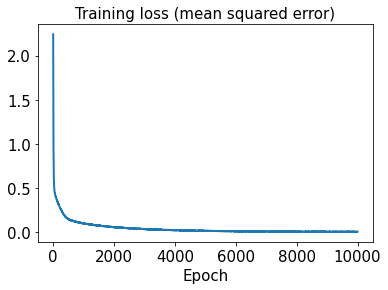

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

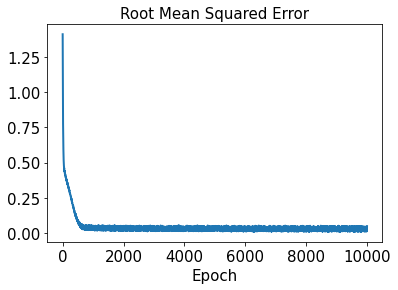

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
error_train_abs1

array([[[1.83746641e-01],
        [1.77816113e-01],
        [1.61867739e-01],
        [4.13335277e-02],
        [8.40623067e-02],
        [1.12013394e-01],
        [1.72741697e-02],
        [1.63190661e-01],
        [6.45056353e-02],
        [3.22133164e-03],
        [2.56338362e-02],
        [2.46815978e-01],
        [1.68036403e-01],
        [2.24377634e-01],
        [1.85465948e-02],
        [1.82286556e-02]],

       [[3.08376573e-01],
        [5.24274287e-02],
        [1.09331795e-01],
        [5.76199808e-02],
        [3.93495736e-01],
        [2.99644093e-02],
        [2.22582723e-01],
        [2.72171400e-01],
        [2.89082847e-01],
        [8.12410387e-02],
        [9.58285113e-02],
        [4.09149108e-01],
        [4.41002437e-01],
        [2.04991826e-01],
        [1.64458799e-01],
        [1.31430604e-01]],

       [[2.44061484e-01],
        [1.53335309e-01],
        [1.62286584e-01],
        [1.72227070e-02],
        [8.62960192e-02],
        [6.78078388e-02],
        

In [29]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.41028065013349313


In [30]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.4324937974713904


In [31]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [32]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 13ms/step - loss: 2.5785 - rmse: 1.6052
Epoch 2/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5094 - rmse: 1.5836
Epoch 3/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.4800 - rmse: 1.5742
Epoch 4/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.4640 - rmse: 1.5692
Epoch 5/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4616 - rmse: 1.5684
Epoch 6/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4459 - rmse: 1.5634
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4373 - rmse: 1.5606
Epoch 8/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4277 - rmse: 1.5575
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4211 - rmse: 1.5554
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4119 - rmse: 1.5525
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 1.8311 - rmse: 1.3526
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8194 - rmse: 1.3482
Epoch 88/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8154 - rmse: 1.3467
Epoch 89/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8103 - rmse: 1.3448
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7987 - rmse: 1.3405
Epoch 91/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7924 - rmse: 1.3382
Epoch 92/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7871 - rmse: 1.3362
Epoch 93/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7765 - rmse: 1.3322
Epoch 94/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7764 - rmse: 1.3322
Epoch 95/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7627 - rmse: 1.3270
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 1.2575 - rmse: 1.1206
Epoch 171/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.2502 - rmse: 1.1174
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2481 - rmse: 1.1164
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2382 - rmse: 1.1120
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2315 - rmse: 1.1090
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2327 - rmse: 1.1095
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2219 - rmse: 1.1046
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2138 - rmse: 1.1010
Epoch 178/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2105 - rmse: 1.0995
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2031 - rmse: 1.0961
Epoch 180/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 0.7777 - rmse: 0.8809
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7714 - rmse: 0.8774
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7691 - rmse: 0.8760
Epoch 257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7642 - rmse: 0.8732
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7599 - rmse: 0.8708
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7576 - rmse: 0.8695
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7486 - rmse: 0.8643
Epoch 261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7447 - rmse: 0.8620
Epoch 262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7420 - rmse: 0.8604
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7351 - rmse: 0.8564
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 14ms/step - loss: 0.4439 - rmse: 0.6650
Epoch 339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4434 - rmse: 0.6646
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4363 - rmse: 0.6593
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4399 - rmse: 0.6620
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4338 - rmse: 0.6574
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4301 - rmse: 0.6546
Epoch 344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4287 - rmse: 0.6535
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4258 - rmse: 0.6513
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4172 - rmse: 0.6447
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4136 - rmse: 0.6419
Epoch 348/10000
2/2 [=======================

2/2 [==============================] - 0s 9ms/step - loss: 0.2273 - rmse: 0.4751
Epoch 423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2246 - rmse: 0.4722
Epoch 424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2230 - rmse: 0.4705
Epoch 425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2248 - rmse: 0.4724
Epoch 426/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2195 - rmse: 0.4668
Epoch 427/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2182 - rmse: 0.4654
Epoch 428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2195 - rmse: 0.4669
Epoch 429/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2204 - rmse: 0.4677
Epoch 430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2151 - rmse: 0.4621
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2110 - rmse: 0.4577
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.1035 - rmse: 0.3193
Epoch 507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1047 - rmse: 0.3211
Epoch 508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1020 - rmse: 0.3168
Epoch 509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1008 - rmse: 0.3150
Epoch 510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1030 - rmse: 0.3185
Epoch 511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0987 - rmse: 0.3117
Epoch 512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1000 - rmse: 0.3138
Epoch 513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0966 - rmse: 0.3083
Epoch 514/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1005 - rmse: 0.3145
Epoch 515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0955 - rmse: 0.3065
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0483 - rmse: 0.2164
Epoch 591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0442 - rmse: 0.2066
Epoch 592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0424 - rmse: 0.2023
Epoch 593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0438 - rmse: 0.2056
Epoch 594/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0413 - rmse: 0.1993
Epoch 595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0442 - rmse: 0.2065
Epoch 596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0408 - rmse: 0.1982
Epoch 597/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0411 - rmse: 0.1989
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0390 - rmse: 0.1935
Epoch 599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0381 - rmse: 0.1913
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0167 - rmse: 0.1231
Epoch 675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0157 - rmse: 0.1192
Epoch 676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0173 - rmse: 0.1259
Epoch 677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0199 - rmse: 0.1355
Epoch 678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0184 - rmse: 0.1301
Epoch 679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0150 - rmse: 0.1163
Epoch 680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0145 - rmse: 0.1140
Epoch 681/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0143 - rmse: 0.1130
Epoch 682/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0171 - rmse: 0.1251
Epoch 683/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0148 - rmse: 0.1153
Epoch 684/10000
2/2 [========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0140 - rmse: 0.1118
Epoch 759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0731
Epoch 760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0096 - rmse: 0.0900
Epoch 761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0771
Epoch 762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0832
Epoch 763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0725
Epoch 764/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0660
Epoch 765/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0870
Epoch 766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0122 - rmse: 0.1035
Epoch 767/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0855
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0819
Epoch 843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0413
Epoch 844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0103 - rmse: 0.0942
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0783
Epoch 846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0476
Epoch 847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.0980
Epoch 848/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0720
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0589
Epoch 850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0729
Epoch 851/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0568
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0773
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0517
Epoch 928/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0416
Epoch 929/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0448
Epoch 930/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0508
Epoch 931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0621
Epoch 932/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0544
Epoch 933/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0742
Epoch 934/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0583
Epoch 935/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0336
Epoch 936/10000
2/2 [========================

2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0791
Epoch 1011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0347
Epoch 1012/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0314
Epoch 1013/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0404
Epoch 1014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0297
Epoch 1015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0468
Epoch 1016/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0802
Epoch 1017/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0531
Epoch 1018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0327
Epoch 1019/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0356
Epoch 1020/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0657
Epoch 1094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0296
Epoch 1095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0318
Epoch 1096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0363
Epoch 1097/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0412
Epoch 1098/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0605
Epoch 1099/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0540
Epoch 1100/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0357
Epoch 1101/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0499
Epoch 1102/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0485
Epoch 1103/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0316
Epoch 1177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0657
Epoch 1178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0410
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0807
Epoch 1180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0537
Epoch 1181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0227
Epoch 1182/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0266
Epoch 1183/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0682
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0534
Epoch 1185/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0854
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0677
Epoch 1260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0265
Epoch 1261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0211
Epoch 1262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0809
Epoch 1263/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0685
Epoch 1264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0761
Epoch 1265/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0721
Epoch 1266/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0610
Epoch 1267/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0807
Epoch 1268/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0826
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0865
Epoch 1343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0358
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0721
Epoch 1345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0386
Epoch 1346/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0662
Epoch 1347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0628
Epoch 1348/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0855
Epoch 1349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0814
Epoch 1350/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0332
Epoch 1351/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0258
Epoch 1352/10000
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0215
Epoch 1426/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0531
Epoch 1427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0890
Epoch 1428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0765
Epoch 1429/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0323
Epoch 1430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0085 - rmse: 0.0849
Epoch 1431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0360
Epoch 1432/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0180
Epoch 1433/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0506
Epoch 1434/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0085 - rmse: 0.0854
Epoch 1435/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0191
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0106
Epoch 1510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0261
Epoch 1511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0696
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0665
Epoch 1513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0270
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0741
Epoch 1515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0484
Epoch 1516/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0286
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0414
Epoch 1518/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0456
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0311
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0480
Epoch 1594/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0528
Epoch 1595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0925
Epoch 1596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0333
Epoch 1597/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0671
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0620
Epoch 1599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0380
Epoch 1600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0668
Epoch 1601/10000
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0174
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0255
Epoch 1676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0822
Epoch 1677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0488
Epoch 1678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0831
Epoch 1679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0284
Epoch 1680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0237
Epoch 1681/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0254
Epoch 1682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0665
Epoch 1683/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0195
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0454
Epoch 1758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0578
Epoch 1759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0841
Epoch 1760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0626
Epoch 1761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0475
Epoch 1762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0795
Epoch 1763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0466
Epoch 1764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0143
Epoch 1765/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0696
Epoch 1766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0319
Epoch 1767/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0351
Epoch 1841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0833
Epoch 1842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0458
Epoch 1843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0684
Epoch 1844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0716
Epoch 1845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0329
Epoch 1846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0674
Epoch 1847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0085 - rmse: 0.0858
Epoch 1848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0349
Epoch 1849/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0715
Epoch 1850/10000
2/2 [=============

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0588
Epoch 1924/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0663
Epoch 1925/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0281
Epoch 1926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0211
Epoch 1927/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0190
Epoch 1928/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0703
Epoch 1929/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0610
Epoch 1930/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0531
Epoch 1931/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0787
Epoch 1932/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0289
Epoch 1933/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0368
Epoch 2007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0935
Epoch 2008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0715
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0436
Epoch 2010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0582
Epoch 2011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0594
Epoch 2012/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0532
Epoch 2013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0411
Epoch 2014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0663
Epoch 2015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0462
Epoch 2016/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0855
Epoch 2090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0306
Epoch 2091/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0270
Epoch 2092/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0697
Epoch 2093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0248
Epoch 2094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0213
Epoch 2095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0783
Epoch 2096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0706
Epoch 2097/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0305
Epoch 2098/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0809
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0440
Epoch 2173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0354
Epoch 2174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0784
Epoch 2175/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0450
Epoch 2176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0793
Epoch 2177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0667
Epoch 2178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0657
Epoch 2179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0759
Epoch 2180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0250
Epoch 2181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0451
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0838
Epoch 2256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0852
Epoch 2257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0434
Epoch 2258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0316
Epoch 2259/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0921
Epoch 2260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0682
Epoch 2261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0494
Epoch 2262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0577
Epoch 2263/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0483
Epoch 2264/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0431
Epoch 2265/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0487
Epoch 2339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0541
Epoch 2340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0688
Epoch 2341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0417
Epoch 2342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0643
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0323
Epoch 2344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0321
Epoch 2345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0366
Epoch 2346/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0445
Epoch 2347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0290
Epoch 2348/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0232
Epoch 2422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0682
Epoch 2423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0548
Epoch 2424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0793
Epoch 2425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0734
Epoch 2426/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0625
Epoch 2427/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0792
Epoch 2428/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0744
Epoch 2429/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0451
Epoch 2430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0587
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0535
Epoch 2505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0496
Epoch 2506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0743
Epoch 2507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0845
Epoch 2508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0415
Epoch 2509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0165
Epoch 2510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0150
Epoch 2511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0677
Epoch 2512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0664
Epoch 2513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0824
Epoch 2514/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0750
Epoch 2588/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0379
Epoch 2589/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0899
Epoch 2590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0451
Epoch 2591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0557
Epoch 2592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0203
Epoch 2593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0392
Epoch 2594/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0838
Epoch 2595/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0878
Epoch 2596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0400
Epoch 2597/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0354
Epoch 2671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0539
Epoch 2672/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0644
Epoch 2673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0217
Epoch 2674/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0601
Epoch 2675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0225
Epoch 2676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0407
Epoch 2677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0770
Epoch 2678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0392
Epoch 2679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0834
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0672
Epoch 2754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0940
Epoch 2755/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0507
Epoch 2756/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0858
Epoch 2757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0555
Epoch 2758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0557
Epoch 2759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0663
Epoch 2760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0349
Epoch 2761/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0842
Epoch 2762/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0469
Epoch 2763/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0681
Epoch 2837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0779
Epoch 2838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0497
Epoch 2839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0896
Epoch 2840/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0668
Epoch 2841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0186
Epoch 2842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0210
Epoch 2843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0498
Epoch 2844/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0162
Epoch 2845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0804
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0891
Epoch 2920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0657
Epoch 2921/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0213
Epoch 2922/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0765
Epoch 2923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0525
Epoch 2924/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0216
Epoch 2925/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0627
Epoch 2926/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0644
Epoch 2927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0229
Epoch 2928/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0712
Epoch 2929/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0693
Epoch 3003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0936
Epoch 3004/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0447
Epoch 3005/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0413
Epoch 3006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0828
Epoch 3007/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0872
Epoch 3008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0704
Epoch 3009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0607
Epoch 3010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0491
Epoch 3011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0693
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0752
Epoch 3086/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0188
Epoch 3087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0217
Epoch 3088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0668
Epoch 3089/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0322
Epoch 3090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0404
Epoch 3091/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0412
Epoch 3092/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0506
Epoch 3093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0616
Epoch 3094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0524
Epoch 3095/10000
2/2 [==============

2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0690
Epoch 3169/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0806
Epoch 3170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0732
Epoch 3171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0873
Epoch 3172/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0669
Epoch 3173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0775
Epoch 3174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0703
Epoch 3175/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0435
Epoch 3176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0540
Epoch 3177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0361
Epoch 3178/10000
2/2 [=============

2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0667
Epoch 3252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0288
Epoch 3253/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0600
Epoch 3254/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0301
Epoch 3255/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0588
Epoch 3256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0848
Epoch 3257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0533
Epoch 3258/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0274
Epoch 3259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0630
Epoch 3260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0455
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0261
Epoch 3335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0755
Epoch 3336/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0519
Epoch 3337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0754
Epoch 3338/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0496
Epoch 3339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0537
Epoch 3340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0209
Epoch 3341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0265
Epoch 3342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0362
Epoch 3343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0495
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0690
Epoch 3418/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0846
Epoch 3419/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0638
Epoch 3420/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0903
Epoch 3421/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0805
Epoch 3422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0678
Epoch 3423/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0089 - rmse: 0.0908
Epoch 3424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0307
Epoch 3425/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0269
Epoch 3426/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0308
Epoch 3427/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0729
Epoch 3501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0317
Epoch 3502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0363
Epoch 3503/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2305e-04 - rmse: 0.0163
Epoch 3504/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0738
Epoch 3505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0876
Epoch 3506/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8268e-04 - rmse: 0.0180
Epoch 3507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0803
Epoch 3508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0523
Epoch 3509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0262
Epoch 3510/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0658
Epoch 3584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0275
Epoch 3585/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0644
Epoch 3586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0357
Epoch 3587/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0689
Epoch 3588/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0785
Epoch 3589/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8588e-04 - rmse: 0.0186
Epoch 3590/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0704
Epoch 3591/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0830
Epoch 3592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0552
Epoch 3593/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 7.5749e-04 - rmse: 0.0116
Epoch 3667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0730
Epoch 3668/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.8654e-04 - rmse: 0.0191
Epoch 3669/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0262
Epoch 3670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0352
Epoch 3671/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4695e-04 - rmse: 0.0112
Epoch 3672/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0834
Epoch 3673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0821
Epoch 3674/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2759e-04 - rmse: 0.0144
Epoch 3675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0788
Epoch 3676/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0602
Epoch 3750/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0644
Epoch 3751/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0470
Epoch 3752/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0335
Epoch 3753/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0591
Epoch 3754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0818
Epoch 3755/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0346
Epoch 3756/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0259
Epoch 3757/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0819
Epoch 3758/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0818
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0273
Epoch 3833/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0429
Epoch 3834/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5768e-04 - rmse: 0.0164
Epoch 3835/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4393e-04 - rmse: 0.0160
Epoch 3836/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0388
Epoch 3837/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8726e-04 - rmse: 0.0100
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0557
Epoch 3839/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0727
Epoch 3840/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9920e-04 - rmse: 0.0146
Epoch 3841/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9904e-04 - rmse: 0.0177
Epoch 3842/10000

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0478
Epoch 3916/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0686
Epoch 3917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0253
Epoch 3918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0905
Epoch 3919/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0371
Epoch 3920/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0633
Epoch 3921/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0395
Epoch 3922/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0275
Epoch 3923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0600
Epoch 3924/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0267
Epoch 3925/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0655
Epoch 3999/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0649
Epoch 4000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0452
Epoch 4001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0821
Epoch 4002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0534
Epoch 4003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0480
Epoch 4004/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0335
Epoch 4005/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0788
Epoch 4006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0831
Epoch 4007/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0484
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0658
Epoch 4082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0824
Epoch 4083/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0566
Epoch 4084/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0611
Epoch 4085/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6173e-04 - rmse: 0.0206
Epoch 4086/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2382e-04 - rmse: 0.0136
Epoch 4087/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0843
Epoch 4088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0825
Epoch 4089/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0646
Epoch 4090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0652
Epoch 4091/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 9.1960e-04 - rmse: 0.0199
Epoch 4165/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0801
Epoch 4166/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0619
Epoch 4167/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0794
Epoch 4168/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0817
Epoch 4169/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0413
Epoch 4170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0515
Epoch 4171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0774
Epoch 4172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0275
Epoch 4173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0852
Epoch 4174/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0664
Epoch 4248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0692
Epoch 4249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0773
Epoch 4250/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0748
Epoch 4251/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7873e-04 - rmse: 0.0131
Epoch 4252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0485
Epoch 4253/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0878
Epoch 4254/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0709
Epoch 4255/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0617
Epoch 4256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0296
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0686
Epoch 4331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0922
Epoch 4332/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0507
Epoch 4333/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0767
Epoch 4334/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0807
Epoch 4335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0487
Epoch 4336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0884
Epoch 4337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0700
Epoch 4338/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0361
Epoch 4339/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0687
Epoch 4340/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0651
Epoch 4414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0467
Epoch 4415/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8639e-04 - rmse: 0.0103
Epoch 4416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0631
Epoch 4417/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2606e-04 - rmse: 0.0211
Epoch 4418/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0548e-04 - rmse: 0.0113
Epoch 4419/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0487
Epoch 4420/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0364
Epoch 4421/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0479
Epoch 4422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0514
Epoch 4423/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 7.4824e-04 - rmse: 0.0168
Epoch 4497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0897
Epoch 4498/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0380
Epoch 4499/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0233
Epoch 4500/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.2981e-04 - rmse: 0.0215
Epoch 4501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0835
Epoch 4502/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0540
Epoch 4503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0441
Epoch 4504/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0364
Epoch 4505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0822
Epoch 4506/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0400
Epoch 4580/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0604
Epoch 4581/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0492
Epoch 4582/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5965e-04 - rmse: 0.0174
Epoch 4583/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1191e-04 - rmse: 0.0189
Epoch 4584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0756
Epoch 4585/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0447
Epoch 4586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0570
Epoch 4587/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0694
Epoch 4588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0743
Epoch 4589/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0661
Epoch 4663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0351
Epoch 4664/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9975e-04 - rmse: 0.0236
Epoch 4665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0734
Epoch 4666/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0292
Epoch 4667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0271
Epoch 4668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0843
Epoch 4669/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0341
Epoch 4670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0628
Epoch 4671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0417
Epoch 4672/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0293
Epoch 4746/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6577e-04 - rmse: 0.0183
Epoch 4747/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0358
Epoch 4748/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0443
Epoch 4749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0878
Epoch 4750/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0450
Epoch 4751/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5895e-04 - rmse: 0.0151
Epoch 4752/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0582
Epoch 4753/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0430
Epoch 4754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0511
Epoch 4755/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 7.4886e-04 - rmse: 0.0182
Epoch 4829/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0295
Epoch 4830/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0525
Epoch 4831/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0779
Epoch 4832/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5066e-04 - rmse: 0.0231
Epoch 4833/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0362
Epoch 4834/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0359
Epoch 4835/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0648
Epoch 4836/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5002e-04 - rmse: 0.0231
Epoch 4837/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0620
Epoch 4838/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0851
Epoch 4911/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9112e-04 - rmse: 0.0220
Epoch 4912/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0580
Epoch 4913/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0332
Epoch 4914/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0256
Epoch 4915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0466
Epoch 4916/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0844
Epoch 4917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0308
Epoch 4918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0311
Epoch 4919/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0645
Epoch 4920/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0615
Epoch 4994/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0648
Epoch 4995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0730
Epoch 4996/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0786
Epoch 4997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0819
Epoch 4998/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0310
Epoch 4999/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5578e-04 - rmse: 0.0161
Epoch 5000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0426
Epoch 5001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0657
Epoch 5002/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0776
Epoch 5003/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0472
Epoch 5076/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0747
Epoch 5077/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0849
Epoch 5078/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0574
Epoch 5079/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0857
Epoch 5080/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0336
Epoch 5081/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 5082/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8900e-04 - rmse: 0.0174
Epoch 5083/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9042e-04 - rmse: 0.0224
Epoch 5084/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0278
Epoch 5085/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 6.5838e-04 - rmse: 0.0168
Epoch 5159/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.0251e-04 - rmse: 0.0180
Epoch 5160/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0309
Epoch 5161/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0449
Epoch 5162/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0297
Epoch 5163/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0266
Epoch 5164/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4417e-04 - rmse: 0.0083
Epoch 5165/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 5166/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.2550e-04 - rmse: 0.0158
Epoch 5167/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6672e-04 - rmse: 0.0171
Epoch 5168/10000


2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0258
Epoch 5241/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0495
Epoch 5242/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 5243/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0488
Epoch 5244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0466
Epoch 5245/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9033e-04 - rmse: 0.0149
Epoch 5246/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0736
Epoch 5247/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0282
Epoch 5248/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0311e-04 - rmse: 0.0154
Epoch 5249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0645
Epoch 5250/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0796
Epoch 5324/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0583
Epoch 5325/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7243e-04 - rmse: 0.0147
Epoch 5326/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0412
Epoch 5327/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0643
Epoch 5328/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3505e-04 - rmse: 0.0194
Epoch 5329/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9723e-04 - rmse: 0.0184
Epoch 5330/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9527e-04 - rmse: 0.0184
Epoch 5331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0817
Epoch 5332/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0747
Epoch 5333/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0781
Epoch 5406/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0441
Epoch 5407/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0700
Epoch 5408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0837
Epoch 5409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0351
Epoch 5410/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0408
Epoch 5411/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0890
Epoch 5412/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0552
Epoch 5413/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0896
Epoch 5414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0783
Epoch 5415/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0817
Epoch 5488/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0663
Epoch 5489/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 5490/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2233e-04 - rmse: 0.0091
Epoch 5491/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0395
Epoch 5492/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.0209e-04 - rmse: 0.0127
Epoch 5493/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0424
Epoch 5494/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0878
Epoch 5495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0265
Epoch 5496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0566
Epoch 5497/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 6.2743e-04 - rmse: 0.0172
Epoch 5571/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0654
Epoch 5572/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 5573/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0518
Epoch 5574/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0616
Epoch 5575/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0771
Epoch 5576/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0673
Epoch 5577/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8154e-04 - rmse: 0.0187
Epoch 5578/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0754
Epoch 5579/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0455
Epoch 5580/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0751
Epoch 5653/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0617
Epoch 5654/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0740
Epoch 5655/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0745
Epoch 5656/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0822
Epoch 5657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 5658/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0752
Epoch 5659/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 5660/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0624
Epoch 5661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0522
Epoch 5662/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 5735/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6362e-04 - rmse: 0.0157
Epoch 5736/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 5737/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0555
Epoch 5738/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7275e-04 - rmse: 0.0160
Epoch 5739/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0022e-04 - rmse: 0.0169
Epoch 5740/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0554e-04 - rmse: 0.0170
Epoch 5741/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 5742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 5743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0727
Epoch 5744/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 5817/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 5818/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0722
Epoch 5819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0271
Epoch 5820/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 5821/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0422
Epoch 5822/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0734
Epoch 5823/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9758e-04 - rmse: 0.0242
Epoch 5824/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2375e-04 - rmse: 0.0146
Epoch 5825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 5826/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0355
Epoch 5899/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6014e-04 - rmse: 0.0189
Epoch 5900/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0301
Epoch 5901/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2352e-04 - rmse: 0.0110
Epoch 5902/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5959e-04 - rmse: 0.0189
Epoch 5903/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0426
Epoch 5904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0510
Epoch 5905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 5906/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0483
Epoch 5907/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.9360e-04 - rmse: 0.0222
Epoch 5908/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0453
Epoch 5981/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 5982/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0689
Epoch 5983/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 5984/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0783
Epoch 5985/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 5986/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3710e-04 - rmse: 0.0119
Epoch 5987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0554
Epoch 5988/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9893e-04 - rmse: 0.0175
Epoch 5989/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0684
Epoch 5990/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0396
Epoch 6064/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 6065/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0766
Epoch 6066/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0679
Epoch 6067/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 6068/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0694
Epoch 6069/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0850
Epoch 6070/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0421
Epoch 6071/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8870e-04 - rmse: 0.0200
Epoch 6072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0801
Epoch 6073/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0482
Epoch 6147/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 6148/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6790e-04 - rmse: 0.0262
Epoch 6149/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6171e-04 - rmse: 0.0261
Epoch 6150/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0467
Epoch 6151/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6445e-04 - rmse: 0.0168
Epoch 6152/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0667
Epoch 6153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0602
Epoch 6154/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 6155/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 6156/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 6229/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0388
Epoch 6230/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9989e-04 - rmse: 0.0269
Epoch 6231/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1605e-04 - rmse: 0.0232
Epoch 6232/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0817
Epoch 6233/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0359
Epoch 6234/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 6235/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 6236/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0806
Epoch 6237/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5254e-04 - rmse: 0.0219
Epoch 6238/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0748
Epoch 6312/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1750e-04 - rmse: 0.0234
Epoch 6313/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0822
Epoch 6314/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9283e-04 - rmse: 0.0229
Epoch 6315/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 6316/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0437
Epoch 6317/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4336e-04 - rmse: 0.0086
Epoch 6318/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0842
Epoch 6319/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3019e-04 - rmse: 0.0215
Epoch 6320/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0478
Epoch 6321/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0662
Epoch 6395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 6396/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7996e-04 - rmse: 0.0227
Epoch 6397/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0615
Epoch 6398/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0812
Epoch 6399/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0899
Epoch 6400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 6401/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 6402/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 6403/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0529
Epoch 6404/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0313
Epoch 6478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0569
Epoch 6479/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0657
Epoch 6480/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0819
Epoch 6481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 6482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0845
Epoch 6483/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 6484/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0771
Epoch 6485/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 6486/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0879
Epoch 6487/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 6561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0778
Epoch 6562/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 6563/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 6564/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 6565/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0708
Epoch 6566/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0410
Epoch 6567/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0815
Epoch 6568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 6569/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 6570/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0841
Epoch 6644/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0698
Epoch 6645/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0798
Epoch 6646/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0843
Epoch 6647/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 6648/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0660
Epoch 6649/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 6650/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1081e-04 - rmse: 0.0190
Epoch 6651/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.0370e-04 - rmse: 0.0213
Epoch 6652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0835
Epoch 6653/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0651
Epoch 6726/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1479e-04 - rmse: 0.0131
Epoch 6727/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9088e-04 - rmse: 0.0157
Epoch 6728/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1380e-04 - rmse: 0.0131
Epoch 6729/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 6730/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0777
Epoch 6731/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0527
Epoch 6732/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 6733/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 6734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0785
Epoch 6735/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 9.3516e-04 - rmse: 0.0264
Epoch 6808/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5683e-04 - rmse: 0.0179
Epoch 6809/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 6810/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0881
Epoch 6811/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0704
Epoch 6812/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 6813/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0492
Epoch 6814/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 6815/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5459e-04 - rmse: 0.0227
Epoch 6816/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0861
Epoch 6817/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0311
Epoch 6891/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0875
Epoch 6892/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0871
Epoch 6893/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8962e-04 - rmse: 0.0160
Epoch 6894/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0886
Epoch 6895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0739
Epoch 6896/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 6897/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 6898/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0669
Epoch 6899/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5679e-04 - rmse: 0.0269
Epoch 6900/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 5.1012e-04 - rmse: 0.0168
Epoch 6974/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0782
Epoch 6975/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0647
Epoch 6976/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 6977/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0332
Epoch 6978/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0418
Epoch 6979/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0318
Epoch 6980/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0504
Epoch 6981/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0627
Epoch 6982/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 6983/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 5.2282e-04 - rmse: 0.0173
Epoch 7057/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0735
Epoch 7058/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7093e-04 - rmse: 0.0186
Epoch 7059/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0432
Epoch 7060/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 7061/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 7062/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.9468e-04 - rmse: 0.0131
Epoch 7063/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3812e-04 - rmse: 0.0107
Epoch 7064/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8586e-04 - rmse: 0.0079
Epoch 7065/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 7066/10000


2/2 [==============================] - 0s 9ms/step - loss: 5.0145e-04 - rmse: 0.0168
Epoch 7139/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0399
Epoch 7140/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 7141/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8121e-04 - rmse: 0.0127
Epoch 7142/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0748
Epoch 7143/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0875
Epoch 7144/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4288e-04 - rmse: 0.0269
Epoch 7145/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0904
Epoch 7146/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1274e-04 - rmse: 0.0264
Epoch 7147/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0614
Epoch 7148/10000
2/2

2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0588
Epoch 7222/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 7223/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 7224/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0739
Epoch 7225/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0289
Epoch 7226/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 7227/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0531
Epoch 7228/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9544e-04 - rmse: 0.0168
Epoch 7229/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 7230/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7398e-04 - rmse: 0.0237
Epoch 7231/10000
2/2 [======

2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0745
Epoch 7304/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0825
Epoch 7305/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0362
Epoch 7306/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1349e-04 - rmse: 0.0265
Epoch 7307/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 7308/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6284e-04 - rmse: 0.0235
Epoch 7309/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 7310/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.6646e-04 - rmse: 0.0214
Epoch 7311/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7984e-04 - rmse: 0.0239
Epoch 7312/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0574
Epoch 7313/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0788
Epoch 7387/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0578
Epoch 7388/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 7389/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0739
Epoch 7390/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5610e-04 - rmse: 0.0187
Epoch 7391/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0406
Epoch 7392/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0654
Epoch 7393/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0491
Epoch 7394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 7395/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 7396/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 7470/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.0390e-04 - rmse: 0.0201
Epoch 7471/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0773
Epoch 7472/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0376
Epoch 7473/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 7474/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0829
Epoch 7475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0652
Epoch 7476/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8785e-04 - rmse: 0.0169
Epoch 7477/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0429
Epoch 7478/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6580e-04 - rmse: 0.0128
Epoch 7479/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 7552/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1461e-04 - rmse: 0.0204
Epoch 7553/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 7554/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 7555/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 7556/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 7557/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0642
Epoch 7558/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0349
Epoch 7559/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 7560/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9178e-04 - rmse: 0.0223
Epoch 7561/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0658
Epoch 7635/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0642
Epoch 7636/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 7637/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 7638/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6267e-04 - rmse: 0.0278
Epoch 7639/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2345e-04 - rmse: 0.0270
Epoch 7640/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4244e-04 - rmse: 0.0255
Epoch 7641/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0641
Epoch 7642/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 7643/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0543
Epoch 7644/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 3.3725e-04 - rmse: 0.0122
Epoch 7718/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5500e-04 - rmse: 0.0163
Epoch 7719/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 7720/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0488
Epoch 7721/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0557
Epoch 7722/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 7723/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0563
Epoch 7724/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2792e-04 - rmse: 0.0155
Epoch 7725/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0792
Epoch 7726/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0287e-04 - rmse: 0.0204
Epoch 7727/10000
2/2

Epoch 7800/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0390
Epoch 7801/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0589
Epoch 7802/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0317
Epoch 7803/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0799
Epoch 7804/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.9247e-04 - rmse: 0.0266
Epoch 7805/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 7806/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0082 - rmse: 0.0897
Epoch 7807/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 7808/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 7809/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0612
Epoch 7810/10000

2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 7884/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.8848e-04 - rmse: 0.0247
Epoch 7885/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0745
Epoch 7886/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0754
Epoch 7887/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6677e-04 - rmse: 0.0197
Epoch 7888/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 7889/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 7890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0624
Epoch 7891/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0581
Epoch 7892/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8311e-04 - rmse: 0.0224
Epoch 7893/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0537
Epoch 7966/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 7967/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 7968/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 7969/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0355
Epoch 7970/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4943e-04 - rmse: 0.0132
Epoch 7971/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 7972/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0642e-04 - rmse: 0.0152
Epoch 7973/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0463
Epoch 7974/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7515e-04 - rmse: 0.0141
Epoch 7975/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0836
Epoch 8048/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 8049/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 8050/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5216e-04 - rmse: 0.0219
Epoch 8051/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0292
Epoch 8052/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9276e-04 - rmse: 0.0249
Epoch 8053/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4738e-04 - rmse: 0.0166
Epoch 8054/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0751
Epoch 8055/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.7863e-04 - rmse: 0.0202
Epoch 8056/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0755
Epoch 8057/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 5.6544e-04 - rmse: 0.0199
Epoch 8130/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4555e-04 - rmse: 0.0260
Epoch 8131/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 8132/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 8133/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0404
Epoch 8134/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 8135/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0323
Epoch 8136/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1798e-04 - rmse: 0.0187
Epoch 8137/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 8138/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0661
Epoch 8139/10000
2/2 [=

2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0607
Epoch 8213/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0794
Epoch 8214/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0552
Epoch 8215/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6006e-04 - rmse: 0.0171
Epoch 8216/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0593
Epoch 8217/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6353e-04 - rmse: 0.0199
Epoch 8218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0700
Epoch 8219/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3656e-04 - rmse: 0.0259
Epoch 8220/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 8221/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 8222/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0477
Epoch 8295/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 8296/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8737e-04 - rmse: 0.0250
Epoch 8297/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0505
Epoch 8298/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8050e-04 - rmse: 0.0178
Epoch 8299/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 8300/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0738
Epoch 8301/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0737
Epoch 8302/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 8303/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0892
Epoch 8304/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 8378/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 8379/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 8380/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 8381/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 8382/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4767e-04 - rmse: 0.0221
Epoch 8383/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 8384/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 8385/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0516
Epoch 8386/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 8387/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 2.8000e-04 - rmse: 0.0111
Epoch 8460/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 8461/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 8462/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 8463/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 8464/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 8465/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8782e-04 - rmse: 0.0152
Epoch 8466/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 8467/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 8468/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 8469/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 6.5809e-04 - rmse: 0.0225
Epoch 8542/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 8543/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3434e-04 - rmse: 0.0219
Epoch 8544/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9123e-04 - rmse: 0.0184
Epoch 8545/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 8546/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5976e-04 - rmse: 0.0246
Epoch 8547/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0995e-04 - rmse: 0.0256
Epoch 8548/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 8549/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 8550/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 8551/10000


Epoch 8624/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 8625/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2408e-04 - rmse: 0.0240
Epoch 8626/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 8627/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 8628/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0856
Epoch 8629/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5507e-04 - rmse: 0.0201
Epoch 8630/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 8631/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 8632/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 8633/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 8634/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0810
Epoch 8707/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 8708/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0900
Epoch 8709/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0725
Epoch 8710/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 8711/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 8712/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 8713/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 8714/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0493
Epoch 8715/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 8716/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0530
Epoch 8790/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5576e-04 - rmse: 0.0285
Epoch 8791/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0506
Epoch 8792/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 8793/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2528e-04 - rmse: 0.0090
Epoch 8794/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9460e-04 - rmse: 0.0212
Epoch 8795/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2514e-04 - rmse: 0.0261
Epoch 8796/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9293e-04 - rmse: 0.0122
Epoch 8797/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2465e-04 - rmse: 0.0279
Epoch 8798/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2684e-04 - rmse: 0.0091
Epoch 87

2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0864
Epoch 8872/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 8873/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0546
Epoch 8874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0449
Epoch 8875/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0324
Epoch 8876/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 8877/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 8878/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 8879/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0922
Epoch 8880/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 8881/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0385
Epoch 8955/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 8956/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0891e-04 - rmse: 0.0192
Epoch 8957/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 8958/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 8959/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 8960/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 8961/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1231e-04 - rmse: 0.0165
Epoch 8962/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 8963/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7358e-04 - rmse: 0.0231
Epoch 8964/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0777
Epoch 9038/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2253e-04 - rmse: 0.0280
Epoch 9039/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0573
Epoch 9040/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 9041/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1595e-04 - rmse: 0.0134
Epoch 9042/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0672
Epoch 9043/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5660e-04 - rmse: 0.0149
Epoch 9044/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 9045/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 9046/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 9047/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 9121/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.4911e-04 - rmse: 0.0227
Epoch 9122/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0603
Epoch 9123/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0476
Epoch 9124/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 9125/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.7458e-04 - rmse: 0.0290
Epoch 9126/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0598
Epoch 9127/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0804
Epoch 9128/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6231e-04 - rmse: 0.0270
Epoch 9129/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 9130/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 9203/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0503
Epoch 9204/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7012e-04 - rmse: 0.0154
Epoch 9205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0875
Epoch 9206/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 9207/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 9208/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0878
Epoch 9209/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 9210/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 9211/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0392
Epoch 9212/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 9285/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0605
Epoch 9286/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0876
Epoch 9287/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0644
Epoch 9288/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0835
Epoch 9289/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 9290/10000
2/2 [==============================] - 0s 34ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 9291/10000
2/2 [==============================] - 0s 32ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 9292/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6069e-04 - rmse: 0.0114
Epoch 9293/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 9294/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 9367/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 9368/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8227e-04 - rmse: 0.0256
Epoch 9369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 9370/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7430e-04 - rmse: 0.0211
Epoch 9371/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 9372/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0354
Epoch 9373/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 9374/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 9375/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 9376/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 9449/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 9450/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0705
Epoch 9451/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 9452/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 9453/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 9454/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 9455/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2628e-04 - rmse: 0.0283
Epoch 9456/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0606
Epoch 9457/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0488
Epoch 9458/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 7.0046e-04 - rmse: 0.0240
Epoch 9531/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 9532/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 9533/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 9534/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0514
Epoch 9535/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 9536/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 9537/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 9538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0852
Epoch 9539/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 9540/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 9614/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 9615/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9316e-04 - rmse: 0.0085
Epoch 9616/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 9617/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0724
Epoch 9618/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8388e-04 - rmse: 0.0191
Epoch 9619/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 9620/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0681
Epoch 9621/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0262e-04 - rmse: 0.0168
Epoch 9622/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 9623/10000
2/2 [===

2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 9696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 9697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 9698/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0365
Epoch 9699/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0420
Epoch 9700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 9701/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 9702/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 9703/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 9704/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 9705/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 9778/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 9779/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4832e-04 - rmse: 0.0115
Epoch 9780/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5836e-04 - rmse: 0.0253
Epoch 9781/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0682
Epoch 9782/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 9783/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 9784/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0428
Epoch 9785/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 9786/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3689e-04 - rmse: 0.0286
Epoch 9787/10000
2

2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 9860/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0563
Epoch 9861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0465
Epoch 9862/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6946e-04 - rmse: 0.0293
Epoch 9863/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0313
Epoch 9864/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 9865/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 9866/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0607
Epoch 9867/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0488
Epoch 9868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0514
Epoch 9869/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 8.3892e-04 - rmse: 0.0270
Epoch 9942/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4814e-04 - rmse: 0.0117
Epoch 9943/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7267e-04 - rmse: 0.0276
Epoch 9944/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.1976e-04 - rmse: 0.0104
Epoch 9945/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4040e-04 - rmse: 0.0113
Epoch 9946/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 9947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0875
Epoch 9948/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2903e-04 - rmse: 0.0248
Epoch 9949/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 9950/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 9

In [33]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:18.088981


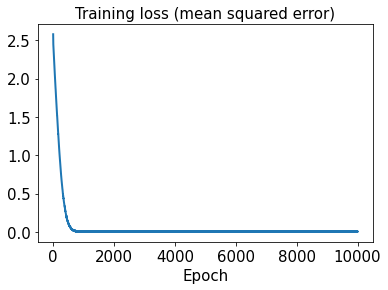

In [34]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

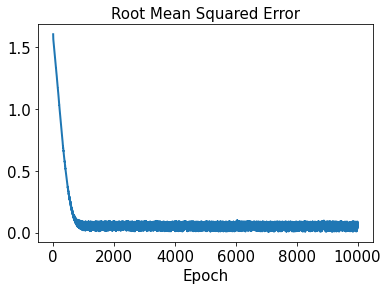

In [35]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [37]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [38]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [39]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [40]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.06827299539421859


In [41]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.07057133032073486


In [54]:
error_train_abs2

array([[[1.10688400e-02],
        [9.34481907e-02],
        [1.00046949e-01],
        [1.18732457e-01],
        [2.76663780e-03],
        [5.04391956e-02],
        [1.64611940e-01],
        [4.75723076e-02],
        [3.50756216e-02],
        [1.21691470e-01],
        [9.21236801e-02],
        [1.44319344e-02],
        [1.15469937e-01],
        [2.77955055e-03],
        [9.60259247e-02],
        [4.00495815e-02]],

       [[6.77496266e-02],
        [8.57681227e-02],
        [1.83505864e-01],
        [1.48901863e-01],
        [8.83902502e-02],
        [1.49229677e-01],
        [7.38465023e-02],
        [7.03117800e-02],
        [7.39019227e-02],
        [1.84088869e-01],
        [1.57203431e-01],
        [2.27774448e-01],
        [9.56807566e-02],
        [1.82324047e-01],
        [9.26773024e-02],
        [1.92723770e-01]],

       [[2.08475065e-02],
        [7.90746021e-02],
        [7.29608822e-02],
        [8.42327642e-02],
        [3.84352684e-03],
        [5.79812813e-02],
        

In [42]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [43]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 15ms/step - loss: 3.7845 - rmse: 1.9453
Epoch 2/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7088 - rmse: 1.9258
Epoch 3/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.6625 - rmse: 1.9137
Epoch 4/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6307 - rmse: 1.9054
Epoch 5/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6047 - rmse: 1.8986
Epoch 6/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.5782 - rmse: 1.8916
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5520 - rmse: 1.8847
Epoch 8/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5272 - rmse: 1.8781
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5144 - rmse: 1.8746
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.4921 - rmse: 1.8687
Epoch 11/10000
2/2 [=====================

2/2 [==============================] - 0s 6ms/step - loss: 2.4863 - rmse: 1.5768
Epoch 87/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4742 - rmse: 1.5729
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4631 - rmse: 1.5694
Epoch 89/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4607 - rmse: 1.5686
Epoch 90/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4470 - rmse: 1.5642
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4344 - rmse: 1.5602
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4239 - rmse: 1.5568
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4185 - rmse: 1.5551
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4003 - rmse: 1.5493
Epoch 95/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3910 - rmse: 1.5462
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 1.7301 - rmse: 1.3153
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7224 - rmse: 1.3124
Epoch 172/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7172 - rmse: 1.3104
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7108 - rmse: 1.3079
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7007 - rmse: 1.3041
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6940 - rmse: 1.3015
Epoch 176/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6911 - rmse: 1.3004
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6791 - rmse: 1.2958
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6776 - rmse: 1.2952
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6642 - rmse: 1.2900
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 1.1898 - rmse: 1.0907
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1853 - rmse: 1.0887
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1813 - rmse: 1.0868
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1755 - rmse: 1.0841
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1695 - rmse: 1.0814
Epoch 259/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1621 - rmse: 1.0780
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1588 - rmse: 1.0764
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1524 - rmse: 1.0735
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1461 - rmse: 1.0705
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1444 - rmse: 1.0697
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 10ms/step - loss: 0.7863 - rmse: 0.8867
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7819 - rmse: 0.8842
Epoch 340/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7795 - rmse: 0.8828
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7744 - rmse: 0.8800
Epoch 342/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7737 - rmse: 0.8795
Epoch 343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7663 - rmse: 0.8753
Epoch 344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7643 - rmse: 0.8742
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7609 - rmse: 0.8722
Epoch 346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7541 - rmse: 0.8683
Epoch 347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7534 - rmse: 0.8679
Epoch 348/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.4873 - rmse: 0.6980
Epoch 423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4856 - rmse: 0.6968
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4816 - rmse: 0.6939
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4799 - rmse: 0.6927
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4813 - rmse: 0.6937
Epoch 427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4724 - rmse: 0.6873
Epoch 428/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4753 - rmse: 0.6893
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4689 - rmse: 0.6847
Epoch 430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4624 - rmse: 0.6799
Epoch 431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4643 - rmse: 0.6814
Epoch 432/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.2755 - rmse: 0.5248
Epoch 507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2726 - rmse: 0.5220
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2708 - rmse: 0.5203
Epoch 509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2691 - rmse: 0.5187
Epoch 510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2695 - rmse: 0.5190
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2637 - rmse: 0.5134
Epoch 512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2655 - rmse: 0.5152
Epoch 513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2602 - rmse: 0.5100
Epoch 514/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2623 - rmse: 0.5120
Epoch 515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2569 - rmse: 0.5068
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 0.1470 - rmse: 0.3833
Epoch 591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1486 - rmse: 0.3854
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1446 - rmse: 0.3802
Epoch 593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1457 - rmse: 0.3816
Epoch 594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1434 - rmse: 0.3786
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1443 - rmse: 0.3797
Epoch 596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1438 - rmse: 0.3790
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1398 - rmse: 0.3737
Epoch 598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1411 - rmse: 0.3755
Epoch 599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1370 - rmse: 0.3700
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 7ms/step - loss: 0.0754 - rmse: 0.2743
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0736 - rmse: 0.2711
Epoch 676/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0744 - rmse: 0.2726
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0715 - rmse: 0.2671
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0742 - rmse: 0.2721
Epoch 679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0718 - rmse: 0.2679
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0707 - rmse: 0.2656
Epoch 681/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0724 - rmse: 0.2688
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0720 - rmse: 0.2682
Epoch 683/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0706 - rmse: 0.2656
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.0349 - rmse: 0.1866
Epoch 759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0380 - rmse: 0.1947
Epoch 760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0428 - rmse: 0.2067
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - rmse: 0.1881
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - rmse: 0.1870
Epoch 763/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0372 - rmse: 0.1926
Epoch 764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - rmse: 0.1877
Epoch 765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - rmse: 0.1880
Epoch 766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0336 - rmse: 0.1830
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - rmse: 0.1833
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 6ms/step - loss: 0.0230 - rmse: 0.1513
Epoch 843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0171 - rmse: 0.1305
Epoch 846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0167 - rmse: 0.1289
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0187 - rmse: 0.1363
Epoch 849/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 850/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0193 - rmse: 0.1387
Epoch 851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0153 - rmse: 0.1233
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.1014
Epoch 927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0887
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0890
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.1159
Epoch 930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.1052
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.1034
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0699
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0606
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 1019/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0990
Epoch 1020/10

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 1094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0959
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0948
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 1099/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 1100/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0963
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 1179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 1180/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7985e-04 - rmse: 0.0300
Epoch 1182/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 1183/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.2448e-04 - rmse: 0.0234
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 1185/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 1186/10000
2/2 [

2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 1260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0677
Epoch 1261/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8837e-04 - rmse: 0.0248
Epoch 1264/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 1265/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0949
Epoch 1268/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 1341/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4835e-04 - rmse: 0.0194
Epoch 1342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 1343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 1344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5208e-04 - rmse: 0.0241
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 1347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 1350/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 4.1837e-04 - rmse: 0.0187
Epoch 1423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 1424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0889
Epoch 1425/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7422e-04 - rmse: 0.0265
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1783e-04 - rmse: 0.0273
Epoch 1427/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 1428/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6464e-04 - rmse: 0.0222
Epoch 1429/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0650e-04 - rmse: 0.0252
Epoch 1430/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.3271e-04 - rmse: 0.0215
Epoch 1431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 1505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0520
Epoch 1506/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6638e-04 - rmse: 0.0173
Epoch 1507/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6830e-04 - rmse: 0.0100
Epoch 1508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0809
Epoch 1514/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 1587/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 1588/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 1589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0807
Epoch 1590/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4960e-04 - rmse: 0.0136
Epoch 1591/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6014e-04 - rmse: 0.0097
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 1593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 1594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5285e-04 - rmse: 0.0197
Epoch 1596/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 8.5136e-04 - rmse: 0.0281
Epoch 1669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 1670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 1671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 1672/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4057e-04 - rmse: 0.0240
Epoch 1673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0944
Epoch 1674/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 1675/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1676/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0519
Epoch 1677/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 1678/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 1751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 1752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 1753/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 1754/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6175e-04 - rmse: 0.0173
Epoch 1755/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 1756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0940
Epoch 1757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 1758/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 1760/10000
2/2 [======

2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 1833/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6332e-04 - rmse: 0.0174
Epoch 1834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 1835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 1836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 1837/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7088e-04 - rmse: 0.0247
Epoch 1838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 1839/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6808e-04 - rmse: 0.0105
Epoch 1840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 1841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 1842/10000
2

2/2 [==============================] - 0s 7ms/step - loss: 1.6742e-04 - rmse: 0.0105
Epoch 1915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 1916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1917/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9121e-04 - rmse: 0.0306
Epoch 1918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 1919/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1272e-04 - rmse: 0.0160
Epoch 1920/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3870e-04 - rmse: 0.0135
Epoch 1921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 1922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 1923/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2094e-04 - rmse: 0.0080
Epoch 1924/

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 1998/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0280e-04 - rmse: 0.0069
Epoch 1999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 2000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 2001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0867
Epoch 2002/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7055e-04 - rmse: 0.0178
Epoch 2003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 2005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 2006/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 7.4902e-04 - rmse: 0.0264
Epoch 2079/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6821e-04 - rmse: 0.0227
Epoch 2080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 2081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 2082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 2083/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7961e-04 - rmse: 0.0207
Epoch 2084/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4873e-04 - rmse: 0.0199
Epoch 2085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 2086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 2087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 2088/100

2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 2161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 2162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 2163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 2164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 2165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 2166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.1001
Epoch 2167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 2168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 2169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 2170/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 2243/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3405e-04 - rmse: 0.0136
Epoch 2244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 2245/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4935e-04 - rmse: 0.0200
Epoch 2246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 2247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 2248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 2250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 2251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 2252/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 2325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 2326/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2688e-04 - rmse: 0.0195
Epoch 2327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 2328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 2329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 2330/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 2331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 2332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 2333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 2334/10000
2/2 [====

Epoch 2406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 2408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 2409/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5133e-04 - rmse: 0.0246
Epoch 2410/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6785e-04 - rmse: 0.0206
Epoch 2411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 2412/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 2413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 2414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 2415/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 

2/2 [==============================] - 0s 11ms/step - loss: 3.4811e-04 - rmse: 0.0175
Epoch 2489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 2490/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8784e-04 - rmse: 0.0307
Epoch 2491/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4624e-04 - rmse: 0.0101
Epoch 2492/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 2493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 2494/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 2495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 2496/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 2497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0575
Epoch 2498/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 2571/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 2572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0763
Epoch 2573/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 2574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 2575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 2576/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 2577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0891
Epoch 2578/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0939e-04 - rmse: 0.0258
Epoch 2579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 2580/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 2654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 2655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 2656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 2657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 2659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 2660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 2661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2662/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1944e-04 - rmse: 0.0195
Epoch 2663/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 2736/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.2872e-04 - rmse: 0.0243
Epoch 2737/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8399e-04 - rmse: 0.0291
Epoch 2738/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 2739/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 2740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 2741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 2742/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 2743/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0849
Epoch 2744/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.7065e-04 - rmse: 0.0288
Epoch 2745/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 2818/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6144e-04 - rmse: 0.0206
Epoch 2819/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4536e-04 - rmse: 0.0266
Epoch 2820/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 2821/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 2822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0807
Epoch 2823/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4772e-04 - rmse: 0.0145
Epoch 2824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 2825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 2826/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 2827/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2900/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9425e-04 - rmse: 0.0310
Epoch 2901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 2902/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6747e-04 - rmse: 0.0182
Epoch 2903/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5920e-04 - rmse: 0.0304
Epoch 2904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 2906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0867
Epoch 2907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 2908/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1867e-04 - rmse: 0.0135
Epoch 2909/1000

2/2 [==============================] - 0s 11ms/step - loss: 5.3639e-04 - rmse: 0.0224
Epoch 2982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 2983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 2984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 2985/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1527e-04 - rmse: 0.0297
Epoch 2986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 2987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 2988/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 2989/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0730e-04 - rmse: 0.0217
Epoch 2990/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 2991/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 4.7852e-04 - rmse: 0.0211
Epoch 3064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 3065/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0948
Epoch 3066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 3067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 3068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 3069/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2225e-04 - rmse: 0.0281
Epoch 3070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 3071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 3072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 3073/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3146/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3126e-04 - rmse: 0.0141
Epoch 3147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 3148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 3149/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 3150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 3151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 3152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 3153/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 3154/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8647e-04 - rmse: 0.0188
Epoch 3155/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 3228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 3229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 3230/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 3231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3232/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8467e-04 - rmse: 0.0124
Epoch 3233/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5872e-05 - rmse: 0.0050
Epoch 3234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 3235/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 3236/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 3237/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 3310/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7415e-04 - rmse: 0.0211
Epoch 3311/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 3312/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 3313/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 3314/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 3315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 3316/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2417e-04 - rmse: 0.0263
Epoch 3317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 3318/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.9642e-04 - rmse: 0.0238
Epoch 3319/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 3392/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4281e-04 - rmse: 0.0107
Epoch 3393/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 3394/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6008e-04 - rmse: 0.0182
Epoch 3395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 3396/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4061e-04 - rmse: 0.0106
Epoch 3397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 3398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 3399/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 3400/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 3401/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 3474/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 3475/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 3476/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 3477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 3478/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 3479/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 3480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 3481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 3482/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 3483/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 5.0132e-04 - rmse: 0.0218
Epoch 3556/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 3557/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 3558/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1272e-04 - rmse: 0.0196
Epoch 3559/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 3560/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 3561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 3562/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 3563/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3246e-04 - rmse: 0.0175
Epoch 3564/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 3565/10000
2

Epoch 3637/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 3638/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 3639/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3640/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5416e-04 - rmse: 0.0288
Epoch 3641/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 3642/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6419e-04 - rmse: 0.0117
Epoch 3643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0933
Epoch 3644/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 3645/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 3646/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8882e-04 - rmse: 0.0190
Ep

2/2 [==============================] - 0s 8ms/step - loss: 6.6586e-04 - rmse: 0.0253
Epoch 3719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 3720/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 3721/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 3722/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8724e-04 - rmse: 0.0257
Epoch 3723/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6498e-04 - rmse: 0.0253
Epoch 3724/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1216e-04 - rmse: 0.0221
Epoch 3725/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 3726/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3125e-04 - rmse: 0.0246
Epoch 3727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0948
Epoch 3728/

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 3800/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 3801/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 3802/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 3803/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 3804/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 3805/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0559e-04 - rmse: 0.0090
Epoch 3806/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 3807/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8379e-04 - rmse: 0.0126
Epoch 3808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 3809/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 3882/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 3883/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.3607e-04 - rmse: 0.0267
Epoch 3884/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0451e-04 - rmse: 0.0090
Epoch 3885/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 3886/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2922e-04 - rmse: 0.0301
Epoch 3887/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3327e-04 - rmse: 0.0202
Epoch 3888/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2168e-04 - rmse: 0.0099
Epoch 3889/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 3890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3891/

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 3964/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 3965/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 3966/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4408e-04 - rmse: 0.0303
Epoch 3967/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1357e-04 - rmse: 0.0298
Epoch 3968/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3263e-04 - rmse: 0.0285
Epoch 3969/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 3970/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0522
Epoch 3971/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 3972/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 3973/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 7.9487e-04 - rmse: 0.0278
Epoch 4046/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 4047/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0444e-04 - rmse: 0.0135
Epoch 4048/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 4049/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 4050/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5571e-04 - rmse: 0.0208
Epoch 4051/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5635e-05 - rmse: 0.0086
Epoch 4052/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.8407e-04 - rmse: 0.0276
Epoch 4053/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 4054/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7316e-04 - rmse: 0.0158
Epoch 4

2/2 [==============================] - 0s 12ms/step - loss: 7.8555e-04 - rmse: 0.0276
Epoch 4128/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 4129/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3499e-04 - rmse: 0.0146
Epoch 4130/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6038e-04 - rmse: 0.0306
Epoch 4131/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4132/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6784e-04 - rmse: 0.0157
Epoch 4133/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 4134/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 4135/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 4136/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 4137/100

2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 4210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 4211/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0158e-04 - rmse: 0.0168
Epoch 4212/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 4213/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 4214/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 4215/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 4216/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2467e-04 - rmse: 0.0174
Epoch 4217/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0933
Epoch 4218/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9011e-04 - rmse: 0.0130
Epoch 4219/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 4292/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 4293/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 4294/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9256e-04 - rmse: 0.0165
Epoch 4295/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 4296/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 4297/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 4298/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 4299/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8730e-04 - rmse: 0.0238
Epoch 4300/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 4301/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 9.2818e-04 - rmse: 0.0301
Epoch 4374/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 4375/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 4376/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 4377/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4378/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 4379/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2772e-04 - rmse: 0.0144
Epoch 4380/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0956e-04 - rmse: 0.0170
Epoch 4381/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5724e-04 - rmse: 0.0272
Epoch 4382/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 4383/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 4455/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.6203e-04 - rmse: 0.0273
Epoch 4456/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 4457/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1369e-04 - rmse: 0.0097
Epoch 4458/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 4459/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 4460/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6556e-04 - rmse: 0.0121
Epoch 4461/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6350e-04 - rmse: 0.0120
Epoch 4462/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 4463/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 4464/100

Epoch 4536/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 4537/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 4539/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0323e-04 - rmse: 0.0169
Epoch 4540/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4541/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 4542/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 4543/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4544/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 4545/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 454

2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4619/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 4620/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 4621/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0023e-04 - rmse: 0.0280
Epoch 4622/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0695e-04 - rmse: 0.0281
Epoch 4623/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 4624/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 4625/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.1259e-04 - rmse: 0.0244
Epoch 4626/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 4627/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3287e-04 - rmse: 0.0248
Epoch 4628/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 4701/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4702/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 4703/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 4704/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3741e-04 - rmse: 0.0179
Epoch 4705/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4706/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0963e-05 - rmse: 0.0058
Epoch 4707/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2017e-04 - rmse: 0.0265
Epoch 4708/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4709/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 4710/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 4783/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4784/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 4785/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 4786/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4787/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 4788/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 4789/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 4790/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 4791/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 4792/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 4865/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 4866/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 4867/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 4868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0928
Epoch 4869/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 4870/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 4871/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 4872/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 4873/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0387e-04 - rmse: 0.0169
Epoch 4874/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0912
Epoch 4947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 4948/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8110e-04 - rmse: 0.0311
Epoch 4949/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 4950/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 4951/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 4952/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5060e-04 - rmse: 0.0231
Epoch 4953/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4954/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 4955/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 4956/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 6.1481e-04 - rmse: 0.0245
Epoch 5029/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 5030/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 5031/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 5032/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 5033/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5801e-04 - rmse: 0.0185
Epoch 5034/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 5035/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8030e-04 - rmse: 0.0258
Epoch 5036/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 5037/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4267e-04 - rmse: 0.0288
Epoch 5038/100

2/2 [==============================] - 0s 7ms/step - loss: 5.2805e-04 - rmse: 0.0226
Epoch 5111/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 5112/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5214e-04 - rmse: 0.0183
Epoch 5113/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 5114/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2216e-04 - rmse: 0.0301
Epoch 5115/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 5116/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 5117/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 5118/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 5119/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 5120/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5193/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 5194/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3925e-04 - rmse: 0.0269
Epoch 5195/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 5196/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 5197/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 5198/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5199/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 5200/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 5201/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7751e-04 - rmse: 0.0127
Epoch 5202/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 5275/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4529e-04 - rmse: 0.0152
Epoch 5276/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 5277/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 5278/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 5279/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 5280/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 5281/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 5282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 5283/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 5284/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 1.7030e-04 - rmse: 0.0125
Epoch 5356/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 5357/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0940
Epoch 5358/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 5359/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 5360/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 5361/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 5362/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6164e-04 - rmse: 0.0186
Epoch 5363/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2352e-04 - rmse: 0.0266
Epoch 5364/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0951
Epoch 5365/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 5438/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 5439/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4691e-04 - rmse: 0.0208
Epoch 5440/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 5441/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7849e-04 - rmse: 0.0238
Epoch 5442/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 5443/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3444e-04 - rmse: 0.0228
Epoch 5444/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0766e-04 - rmse: 0.0097
Epoch 5445/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 5446/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 5447/1000

2/2 [==============================] - 0s 12ms/step - loss: 9.9405e-04 - rmse: 0.0313
Epoch 5520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 5521/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 5522/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 5523/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 5524/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1861e-04 - rmse: 0.0143
Epoch 5525/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 5526/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 5527/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.7397e-04 - rmse: 0.0276
Epoch 5528/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0136e-04 - rmse: 0.0197
Epoch 5529/10

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 5602/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 5603/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1096e-04 - rmse: 0.0172
Epoch 5604/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6183e-04 - rmse: 0.0158
Epoch 5605/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1567e-04 - rmse: 0.0142
Epoch 5606/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 5607/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7492e-04 - rmse: 0.0162
Epoch 5608/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 5609/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 5610/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 5611/100

2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 5684/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1563e-04 - rmse: 0.0201
Epoch 5685/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5686/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5687/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2886e-04 - rmse: 0.0204
Epoch 5688/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8235e-04 - rmse: 0.0164
Epoch 5689/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 5690/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 5691/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8375e-04 - rmse: 0.0259
Epoch 5692/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 5693/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 5766/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 5767/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9673e-04 - rmse: 0.0280
Epoch 5768/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2996e-04 - rmse: 0.0204
Epoch 5769/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 5770/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3819e-04 - rmse: 0.0180
Epoch 5771/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 5772/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 5773/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 5774/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 5775/10000
2/2

2/2 [==============================] - 0s 12ms/step - loss: 2.6427e-04 - rmse: 0.0158
Epoch 5848/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1681e-04 - rmse: 0.0201
Epoch 5849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 5850/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0155e-04 - rmse: 0.0170
Epoch 5851/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 5852/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 5853/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 5854/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 5855/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 5856/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 5857/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 5929/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.2354e-04 - rmse: 0.0203
Epoch 5930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 5931/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0618e-04 - rmse: 0.0171
Epoch 5932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 5933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 5934/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.8621e-04 - rmse: 0.0132
Epoch 5935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5936/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 5937/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 5938/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 6011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 6013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 6014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 6015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 6016/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9107e-04 - rmse: 0.0296
Epoch 6017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 6018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 6019/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6020/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 6093/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.4271e-04 - rmse: 0.0230
Epoch 6094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6095/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 6096/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 6097/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8494e-04 - rmse: 0.0259
Epoch 6098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 6099/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 6100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 6101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 6102/10000
2/2 [

2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 6175/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5520e-04 - rmse: 0.0307
Epoch 6176/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0381e-04 - rmse: 0.0171
Epoch 6177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 6178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 6179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3441e-04 - rmse: 0.0111
Epoch 6180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 6181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 6182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 6183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 6184/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 6257/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 6258/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 6259/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7158e-04 - rmse: 0.0257
Epoch 6260/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 6262/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 6263/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 6264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0891
Epoch 6265/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 6266/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6339/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1039e-04 - rmse: 0.0223
Epoch 6340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 6341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 6342/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 6343/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4183e-04 - rmse: 0.0114
Epoch 6344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 6345/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0933
Epoch 6346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 6347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 6348/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 6421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 6422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 6423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6424/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8251e-04 - rmse: 0.0259
Epoch 6425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 6426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 6427/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 6428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 6429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0888
Epoch 6430/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 4.5629e-04 - rmse: 0.0211
Epoch 6503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 6504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 6505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 6506/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6666e-04 - rmse: 0.0236
Epoch 6507/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3896e-04 - rmse: 0.0251
Epoch 6508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 6509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 6510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 6511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 6512/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 8.4190e-04 - rmse: 0.0288
Epoch 6585/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3824e-04 - rmse: 0.0113
Epoch 6586/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5197e-04 - rmse: 0.0290
Epoch 6587/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1027e-04 - rmse: 0.0283
Epoch 6588/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1405e-04 - rmse: 0.0201
Epoch 6589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 6590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 6591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 6592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 6593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 6594

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 6667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 6668/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6669/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 6670/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 6672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 6673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 6675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 6676/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 4.2958e-04 - rmse: 0.0205
Epoch 6749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 6750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 6751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 6752/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 6754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 6755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 6756/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5252e-04 - rmse: 0.0155
Epoch 6757/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 6758/10000
2/2 [=

Epoch 6830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 6831/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 6832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 6834/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 6835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 6837/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 6838/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2378e-04 - rmse: 0.0177
Epoch 6839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 6840

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 6913/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7408e-04 - rmse: 0.0310
Epoch 6914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 6915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 6916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6917/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 6918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 6919/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7516e-04 - rmse: 0.0258
Epoch 6920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 6921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 6922/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 6995/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 6996/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8914e-04 - rmse: 0.0134
Epoch 6997/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8547e-04 - rmse: 0.0132
Epoch 6998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 6999/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 7000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 7001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 7002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 7003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 7004/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 2.7596e-04 - rmse: 0.0163
Epoch 7077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 7079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7080/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4319e-05 - rmse: 0.0058
Epoch 7081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 7083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7084/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9837e-04 - rmse: 0.0137
Epoch 7085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 7086/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 2.9256e-04 - rmse: 0.0168
Epoch 7158/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8385e-04 - rmse: 0.0132
Epoch 7159/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 7160/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8550e-04 - rmse: 0.0132
Epoch 7161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 7162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0809
Epoch 7163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 7164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 7165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 7166/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6606e-04 - rmse: 0.0189
Epoch 7167/1000

2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 7240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 7241/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2478e-04 - rmse: 0.0204
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 7243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 7244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 7245/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5850e-04 - rmse: 0.0308
Epoch 7246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 7247/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3149e-04 - rmse: 0.0149
Epoch 7248/10000
2/

Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 7321/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 7322/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2934e-05 - rmse: 0.0073
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 7325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 7326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 7327/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 7328/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 7330

Epoch 7402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0762e-04 - rmse: 0.0173
Epoch 7404/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4673e-04 - rmse: 0.0184
Epoch 7405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7835e-04 - rmse: 0.0164
Epoch 7407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 7408/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 7409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 7411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0378
E

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 7484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 7485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 7487/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 7488/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 7489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 7490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 7491/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4748e-05 - rmse: 0.0092
Epoch 7492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 7493/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 7567/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6391e-04 - rmse: 0.0188
Epoch 7568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 7571/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6948e-04 - rmse: 0.0237
Epoch 7572/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9770e-04 - rmse: 0.0298
Epoch 7573/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 7574/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2853e-04 - rmse: 0.0268
Epoch 7575/100

Epoch 7647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 7648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 7649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 7650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0636
Epoch 7652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 7653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 7654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 7655/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 7657/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 7730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 7731/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7775e-05 - rmse: 0.0062
Epoch 7732/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6315e-04 - rmse: 0.0159
Epoch 7733/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4399e-05 - rmse: 0.0087
Epoch 7734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 7735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7736/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9421e-04 - rmse: 0.0196
Epoch 7737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 7738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0935
Epoch 7739/100

Epoch 7811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 7812/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2893e-04 - rmse: 0.0179
Epoch 7813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 7814/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9043e-04 - rmse: 0.0219
Epoch 7815/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3389e-04 - rmse: 0.0180
Epoch 7816/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 7817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7819/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2387e-04 - rmse: 0.0177
Epoch 7820/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.03

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7893/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9045e-04 - rmse: 0.0313
Epoch 7894/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9366e-04 - rmse: 0.0196
Epoch 7895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 7896/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5930e-04 - rmse: 0.0187
Epoch 7897/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2724e-04 - rmse: 0.0249
Epoch 7898/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 7899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7901/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 7902/100

2/2 [==============================] - 0s 11ms/step - loss: 3.2537e-04 - rmse: 0.0178
Epoch 7974/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7975/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7976/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 7977/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 7978/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 7979/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4700e-04 - rmse: 0.0117
Epoch 7980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7983/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 6.2531e-04 - rmse: 0.0248
Epoch 8056/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.5869e-04 - rmse: 0.0308
Epoch 8057/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9304e-04 - rmse: 0.0196
Epoch 8058/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0225e-04 - rmse: 0.0299
Epoch 8059/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 8061/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 8062/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 8063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 8064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 8065/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8137/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8138/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7885e-04 - rmse: 0.0192
Epoch 8139/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 8140/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8141/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6036e-04 - rmse: 0.0212
Epoch 8142/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 8143/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9094e-04 - rmse: 0.0135
Epoch 8144/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3933e-04 - rmse: 0.0207
Epoch 8145/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 8146/1000

2/2 [==============================] - 0s 7ms/step - loss: 3.9314e-04 - rmse: 0.0196
Epoch 8219/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7178e-04 - rmse: 0.0191
Epoch 8220/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 8222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 8223/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 8224/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2358e-04 - rmse: 0.0107
Epoch 8225/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5218e-04 - rmse: 0.0120
Epoch 8226/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.9946e-04 - rmse: 0.0281
Epoch 8227/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7452e-04 - rmse: 0.0191
Epoch 8

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8301/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7460e-05 - rmse: 0.0043
Epoch 8302/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8303/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 8304/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 8305/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 8306/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 8307/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8308/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0398e-05 - rmse: 0.0085
Epoch 8309/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3473e-04 - rmse: 0.0206
Epoch 8310/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 4.3821e-04 - rmse: 0.0207
Epoch 8383/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8384/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 8385/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 8386/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0114e-04 - rmse: 0.0263
Epoch 8387/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1686e-04 - rmse: 0.0202
Epoch 8388/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 8389/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8373e-04 - rmse: 0.0278
Epoch 8390/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3533e-04 - rmse: 0.0229
Epoch 8391/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 8392/

2/2 [==============================] - 0s 12ms/step - loss: 9.6238e-04 - rmse: 0.0309
Epoch 8465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 8466/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 8467/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4556e-05 - rmse: 0.0081
Epoch 8468/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 8469/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 8470/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 8471/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7403e-05 - rmse: 0.0070
Epoch 8472/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 8473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8474/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 3.7476e-04 - rmse: 0.0191
Epoch 8547/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 8548/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 8549/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 8550/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2703e-04 - rmse: 0.0286
Epoch 8551/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6344e-04 - rmse: 0.0124
Epoch 8552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8553/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 8554/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6600e-04 - rmse: 0.0236
Epoch 8555/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9856e-04 - rmse: 0.0197
Epoch 8556/

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8629/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5793e-04 - rmse: 0.0212
Epoch 8630/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2112e-04 - rmse: 0.0203
Epoch 8631/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 8632/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2642e-04 - rmse: 0.0204
Epoch 8633/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2294e-04 - rmse: 0.0107
Epoch 8634/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 8635/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 8636/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6458e-04 - rmse: 0.0125
Epoch 8637/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 8638/

2/2 [==============================] - 0s 12ms/step - loss: 2.2007e-04 - rmse: 0.0145
Epoch 8711/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 8712/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8402e-04 - rmse: 0.0133
Epoch 8713/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2592e-04 - rmse: 0.0303
Epoch 8714/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 8715/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 8716/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0678e-05 - rmse: 0.0091
Epoch 8717/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7260e-04 - rmse: 0.0128
Epoch 8718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 8719/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 8720

2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 8793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8795/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 8796/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 8797/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 8798/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 8800/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 8801/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8802/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 8875/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0940
Epoch 8876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 8877/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6423e-04 - rmse: 0.0189
Epoch 8878/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2010e-04 - rmse: 0.0203
Epoch 8879/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 8880/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8881/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 8882/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8883/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 8884/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 8957/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 8958/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 8959/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6159e-04 - rmse: 0.0274
Epoch 8960/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2663e-04 - rmse: 0.0148
Epoch 8961/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 8962/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 8963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 8964/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 8965/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 8966/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 9039/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3085e-04 - rmse: 0.0304
Epoch 9040/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 9041/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 9042/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1337e-05 - rmse: 0.0086
Epoch 9043/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 9044/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9045/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 9046/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 9047/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2929e-04 - rmse: 0.0149
Epoch 9048/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9120/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 9121/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3032e-04 - rmse: 0.0149
Epoch 9122/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 9123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 9124/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4040e-04 - rmse: 0.0152
Epoch 9125/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6564e-04 - rmse: 0.0189
Epoch 9126/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0072e-04 - rmse: 0.0171
Epoch 9127/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 9128/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 9129/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 9202/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 9203/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 9204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 9205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 9206/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9845e-04 - rmse: 0.0315
Epoch 9207/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 9208/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 9209/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 9210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 9211/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 9284/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9285/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 9286/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6137e-04 - rmse: 0.0124
Epoch 9287/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9288/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4645e-04 - rmse: 0.0154
Epoch 9289/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9290/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 9291/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 9292/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2308e-04 - rmse: 0.0177
Epoch 9293/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 9366/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.9644e-04 - rmse: 0.0314
Epoch 9367/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 9368/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6508e-04 - rmse: 0.0189
Epoch 9369/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 9370/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 9371/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 9372/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 9373/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0411e-04 - rmse: 0.0098
Epoch 9374/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 9375/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 9448/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 9449/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9450/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 9451/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 9452/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.0009e-04 - rmse: 0.0198
Epoch 9453/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0349e-04 - rmse: 0.0199
Epoch 9454/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 9455/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4583e-04 - rmse: 0.0154
Epoch 9456/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 9457/10000
2/2

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 9530/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 9531/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 9532/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 9533/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7340e-04 - rmse: 0.0191
Epoch 9534/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5574e-05 - rmse: 0.0069
Epoch 9535/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6355e-05 - rmse: 0.0076
Epoch 9536/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 9537/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 9538/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 9539/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 9612/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 9613/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4618e-05 - rmse: 0.0052
Epoch 9614/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 9615/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 9616/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 9617/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 9618/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 9619/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0894e-04 - rmse: 0.0101
Epoch 9620/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5718e-04 - rmse: 0.0122
Epoch 9621/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 9694/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5121e-04 - rmse: 0.0254
Epoch 9695/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.4184e-04 - rmse: 0.0231
Epoch 9696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 9697/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 9698/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 9699/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 9700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 9701/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 9702/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4038e-04 - rmse: 0.0208
Epoch 9703/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 9776/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 9777/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 9778/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 9779/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 9780/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 9781/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0866
Epoch 9782/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4887e-05 - rmse: 0.0093
Epoch 9783/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2852e-05 - rmse: 0.0050
Epoch 9784/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 9785/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9858/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 9859/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 9860/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 9861/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 9862/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9863/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 9864/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 9865/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 9866/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9261e-04 - rmse: 0.0262
Epoch 9867/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9940/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 9941/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 9942/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 9943/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 9944/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9945/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 9946/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 9947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 9948/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 9949/10000
2/2 [=========

In [44]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:40.279746


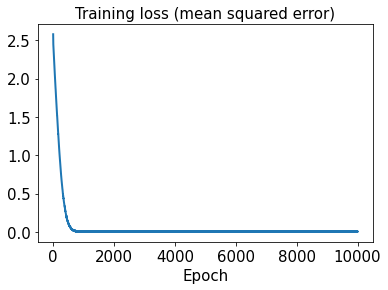

In [45]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

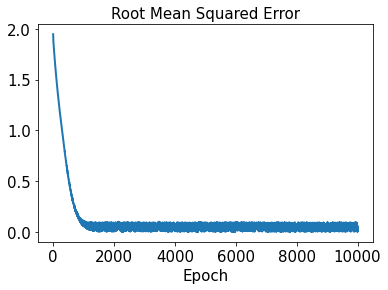

In [46]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [47]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [48]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [49]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [50]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [51]:
error_train_abs3

array([[[1.59878434e-02],
        [1.41958494e-03],
        [4.23045625e-03],
        [1.37831254e-02],
        [2.93657661e-03],
        [1.47552197e-03],
        [1.87561839e-03],
        [3.21973248e-03],
        [6.75959373e-03],
        [3.23260773e-03],
        [7.38181717e-04],
        [7.41825338e-03],
        [1.60992664e-02],
        [1.43460607e-03],
        [2.79248614e-03],
        [1.58678866e-02]],

       [[3.66564401e-02],
        [1.39366370e-02],
        [1.39680731e-02],
        [3.79393257e-02],
        [1.39396468e-02],
        [3.86892811e-03],
        [4.18009799e-03],
        [1.64804356e-02],
        [2.20720069e-02],
        [6.53071586e-03],
        [8.64069710e-03],
        [2.39912576e-02],
        [3.44183742e-02],
        [1.25799650e-02],
        [1.44664900e-02],
        [3.91072316e-02]],

       [[2.00974921e-02],
        [3.04092070e-03],
        [7.63388044e-03],
        [1.71147903e-02],
        [3.43740645e-03],
        [6.92288669e-05],
        

In [52]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.01622146940272277


In [53]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.016015338224339853
